![](images/vaccine-6116391_1920_pixabay.jpg)

# **COVID-19 Vaccination Progress EDA**

***
***

# Table of Contents

1. INTRODUCTION

    *1.1 COVID-19 pandemic*
    
    *1.2 COVID-19 vaccines*
    
    *1.3 Key objective*
    
    *1.4 Dataset overview*

2. IMPORTS AND DATA PREPARATION

    *2.1 Importing libraries and data*

    *2.2 Preliminary data exploration and subsequent cleaning*

    *2.3 Feature engineering to prepare for in-depth data analysis*

3. IN-DEPTH DATA ANALYSIS AND VISUALISATION

    *3.1 Distributions of .... (abs and %)*
    
    *3.2 Time-course of...*
    
    *3.3 TIme-series analysis of...*

***
***

## 1.4 Dataset Overview

**The dataset contains 8079 observations for 15 features.**

| FEATURE | description | comment |
|----|----|----|
| **country** | 151 countries | some duplicates |
| **iso_code** | country code by ISO norm | -|
| **date** | data entry (13th December 2020 to 24th March 2021) | - |
| **vaccines** | name/company | - |
| **daily_vaccinations** | no. of vaccination for that date/country | some days only daily vaccinations, some days only the (cummulative) total |
| **daily_vaccinations_raw** | daily vaccinations as CHANGE COMPARED TO PREVIOUS DAY (sanity check) | - |
| **daily_vaccinations_per_million** | ratio (in ppm) between vaccination number and total population for the current date in the country | - |
| **total_vaccinations** | absolute number of total immunizations in the country | some days only daily vaccinations, some days only the (cummulative) total |
| **total_vaccinations_per_hundred** | ratio (in percent) between vaccination number and total population up to the date in the country | - |
| **people_vaccinated** | total no. of people with immunisation (partial and full) | - |
| **people_vaccinated_per_hundred** | ratio (in percent) between population immunized (partial and full) and total population | - |
| **people_fully_vaccinated** | total no. of people with full immunisation (typically 2) | - |
| **people_fully_vaccinated_per_hundred** | ratio (in percent) between population fully immunized and total population | - |
| **source_name** | national authority, international organization, local organization etc. | - |
| **source_website** | website link | - |

# Introduction

-Vaccinaction: Version 81

-Tweets: Version 43

## Track the progress of COVID-19 vaccination

Was muss für ordentliches Mark up gemacht werden?

-What vaccines are used and in which countries?

-What country is vaccinated more people?

-What country is vaccinated a larger percent from its population?


## Tweets
### Perform sentiment analysis on the tweets looking to things like:

- Sentiment polarity (Negative/Positive/Neutral) in relationship with each vaccine (looking to the association with the vaccine name, as found in tweets);
Evolution of sentiment in time;

Expected:
Data analysis;
Method for sentiment analysis;
Results;
Comments and conclusions.

## Covid-19 vaccination progress:
Content
The data contains the following information:

- Country- this is the country for which the vaccination information is provided;

- Country ISO Code - ISO code for the country;

- Date - date for the data entry; for some of the dates we have only the daily vaccinations, for others, only the (cumulative) total;

- Total number of vaccinations - this is the absolute number of total immunizations in the country;

- Total number of people vaccinated - a person, depending on the immunization scheme, will receive one or more (typically 2) vaccines; at a certain moment, the number of vaccination might be larger than the number of people;

- Total number of people fully vaccinated - this is the number of people that received the entire set of immunization according to the immunization scheme (typically 2); at a certain moment in time, there might be a certain number of people that received one vaccine and another number (smaller) of people that received all vaccines in the scheme;
- Daily vaccinations (raw) - for a certain data entry, the number of vaccination for that date/country (daily_vaccinations_raw: daily change in the total number of doses administered. It is only calculated for consecutive days. This is a raw measure provided for data checks and transparency, but we strongly recommend that any analysis on daily vaccination rates be conducted using daily_vaccinations instead);
- Daily vaccinations - for a certain data entry, the number of vaccination for that date/country;
- Total vaccinations per hundred - ratio (in percent) between vaccination number and total population up to the date in the country;
- Total number of people vaccinated per hundred - ratio (in percent) between population immunized and total population up to the date in the country;
- Total number of people fully vaccinated per hundred - ratio (in percent) between population fully immunized and total population up to the date in the country;
- Number of vaccinations per day - number of daily vaccination for that day and country;
- Daily vaccinations per million - ratio (in ppm) between vaccination number and total population for the current date in the country;
- Vaccines used in the country - total number of vaccines used in the country (up to date);
- Source name - source of the information (national authority, international organization, local organization etc.);
- Source website - website of the source of information;


In [8]:
#common imports:
import numpy as np
import pandas as pd
from datetime import datetime
import os


#import for visualization
from matplotlib.ticker import FuncFormatter
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.colors
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
#for Worldmap
#import shapefile as shp


#for timeseries:
import statsmodels.formula.api as smf
from statsmodels.tsa.seasonal import seasonal_decompose
from scipy.ndimage import gaussian_filter


#from wordcloud import WordCloud
from pandas_profiling import ProfileReport

sns.set(rc={'figure.figsize':(20,15)})


#suppress pandas future warnings:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

    

## First Data overview

In [9]:
#import dataset country_vaccinations:
df = pd.read_csv('data/country_vaccinations.csv')


In [10]:
#first check:
df.head()


,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...


In [11]:
df.tail()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
8074,Zimbabwe,ZWE,2021-03-20,42210.0,42210.0,NaN,523.0,836.0,0.28,0.28,NaN,56.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1374795915...
8075,Zimbabwe,ZWE,2021-03-21,42729.0,42729.0,NaN,519.0,910.0,0.29,0.29,NaN,61.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1374795915...
8076,Zimbabwe,ZWE,2021-03-22,43294.0,43294.0,NaN,565.0,805.0,0.29,0.29,NaN,54.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1374795915...
8077,Zimbabwe,ZWE,2021-03-23,44135.0,44135.0,NaN,841.0,655.0,0.30,0.30,NaN,44.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1374795915...
8078,Zimbabwe,ZWE,2021-03-24,49404.0,49404.0,NaN,5269.0,1400.0,0.33,0.33,NaN,94.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1374795915...


Cleaning tasks:
- First check of data shows a lot missing values. 
- Country and iso_code available but we decided to use country only. 

In [12]:
#Number of columns and rows:
shape1 = df.shape
print(f'We have {shape1[1]} columns and {shape1[0]} rows in our dataset.')

We have 15 columns and 8079 rows in our dataset.


In [13]:
#Information about datatypes per column:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8079 entries, 0 to 8078
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   country                              8079 non-null   object 
 1   iso_code                             8079 non-null   object 
 2   date                                 8079 non-null   object 
 3   total_vaccinations                   4984 non-null   float64
 4   people_vaccinated                    4423 non-null   float64
 5   people_fully_vaccinated              3021 non-null   float64
 6   daily_vaccinations_raw               4192 non-null   float64
 7   daily_vaccinations                   7891 non-null   float64
 8   total_vaccinations_per_hundred       4984 non-null   float64
 9   people_vaccinated_per_hundred        4423 non-null   float64
 10  people_fully_vaccinated_per_hundred  3021 non-null   float64
 11  daily_vaccinations_per_million

Cleaning task: 
- change object to datetime for column date
- Check missing values in all columns with rows less than 8079

In [14]:
df.nunique()

country                                 151
iso_code                                151
date                                    102
total_vaccinations                     4784
people_vaccinated                      4253
people_fully_vaccinated                2880
daily_vaccinations_raw                 3868
daily_vaccinations                     5563
total_vaccinations_per_hundred         1955
people_vaccinated_per_hundred          1663
people_fully_vaccinated_per_hundred     818
daily_vaccinations_per_million         3698
vaccines                                 26
source_name                              92
source_website                          147
dtype: int64

Categorical data: country, iso_code, vaccines, source_name, source_website

In [15]:
#basic statistic
df.describe().transpose().round()

,count,mean,std,min,25%,50%,75%,max
total_vaccinations,4984.0,2597915.0,9383280.0,0.0,40452.0,276962.0,1303350.0,130473853.0
people_vaccinated,4423.0,2073454.0,6824277.0,0.0,36780.0,249555.0,1007708.0,85472166.0
people_fully_vaccinated,3021.0,893378.0,3595095.0,1.0,19019.0,111716.0,488937.0,46365515.0
daily_vaccinations_raw,4192.0,92034.0,289560.0,0.0,2738.0,13838.0,56702.0,4575496.0
daily_vaccinations,7891.0,60968.0,213914.0,1.0,1026.0,6161.0,27794.0,2541597.0
total_vaccinations_per_hundred,4984.0,10.0,18.0,0.0,1.0,4.0,11.0,162.0
people_vaccinated_per_hundred,4423.0,8.0,12.0,0.0,1.0,3.0,9.0,90.0
people_fully_vaccinated_per_hundred,3021.0,4.0,8.0,0.0,0.0,2.0,3.0,72.0
daily_vaccinations_per_million,7891.0,2699.0,4163.0,0.0,363.0,1305.0,3211.0,54264.0


## Data cleaning

In [16]:
#check for missing values
missing_values = pd.DataFrame(df.isnull().sum(), columns=['ID'])
missing_values

,ID
country,0
iso_code,0
date,0
total_vaccinations,3095
people_vaccinated,3656
people_fully_vaccinated,5058
daily_vaccinations_raw,3887
daily_vaccinations,188
total_vaccinations_per_hundred,3095
people_vaccinated_per_hundred,3656


In [17]:
#check for missing values in %
round(100*(df.isnull().sum()/len(df.index)),0)

country                                 0.0
iso_code                                0.0
date                                    0.0
total_vaccinations                     38.0
people_vaccinated                      45.0
people_fully_vaccinated                63.0
daily_vaccinations_raw                 48.0
daily_vaccinations                      2.0
total_vaccinations_per_hundred         38.0
people_vaccinated_per_hundred          45.0
people_fully_vaccinated_per_hundred    63.0
daily_vaccinations_per_million          2.0
vaccines                                0.0
source_name                             0.0
source_website                          0.0
dtype: float64

We have a high percentage of missing values in the vaccine columns.

In [18]:
# generate count statistics of duplicate entries
if len(df[df.duplicated()]) > 0:
    print("No. of duplicated entries: ", len(df[df.duplicated()]))
    print(df[df.duplicated(keep=False)].sort_values(by=list(df.columns)).head())
else:
    print("No duplicated entries found")

No duplicated entries found


Data cleaning tasks:
- countries have different names (e.g. England, United Kingdom, Northern Ireland, Wales, Scotland)
- drop daily_vaccinations_raw
(set categorical data to categorical data tpye)

In [19]:
#copy dataset before cleaning
df1 = df.copy()

In [20]:
#change type for date to datetime
df1['date'] =  pd.to_datetime(df1['date'])
df.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...


In [21]:
#test changes to date
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8079 entries, 0 to 8078
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   country                              8079 non-null   object        
 1   iso_code                             8079 non-null   object        
 2   date                                 8079 non-null   datetime64[ns]
 3   total_vaccinations                   4984 non-null   float64       
 4   people_vaccinated                    4423 non-null   float64       
 5   people_fully_vaccinated              3021 non-null   float64       
 6   daily_vaccinations_raw               4192 non-null   float64       
 7   daily_vaccinations                   7891 non-null   float64       
 8   total_vaccinations_per_hundred       4984 non-null   float64       
 9   people_vaccinated_per_hundred        4423 non-null   float64       
 10  people_fully

## Data cleaning - Nan

We have a lot of missing data and need to check how to handle them:

- First we drop all rows with only Nans/0.0 for all vaccination columns

- people_fully_vaccinated/peple_fully_vaccinated_per_hundred: fill NaNs with 0 as these are missing values because no one is fully vaccinated at that time



In [22]:
# drop all rows with NaNs in 'people_fully_vaccinated', 'daily_vaccinations', 'daily_vaccinations_per_million':
df1.dropna(subset = ['people_fully_vaccinated', 'daily_vaccinations', 'daily_vaccinations_per_million'], axis = 0, how = 'all', inplace = True)
df1.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...
5,Afghanistan,AFG,2021-02-27,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...


In [23]:
#Fill all NaNs for people fully vaccinated and people fully vaccinated per hundred with 0:
df1['people_fully_vaccinated'] = df1['people_fully_vaccinated'].fillna(0)
df1['people_fully_vaccinated_per_hundred'] = df1['people_fully_vaccinated_per_hundred'].fillna(0)

In [24]:
#check for missing data in 
round(100*(df1.isnull().sum()/len(df1.index)),0)

country                                 0.0
iso_code                                0.0
date                                    0.0
total_vaccinations                     39.0
people_vaccinated                      46.0
people_fully_vaccinated                 0.0
daily_vaccinations_raw                 47.0
daily_vaccinations                      0.0
total_vaccinations_per_hundred         39.0
people_vaccinated_per_hundred          46.0
people_fully_vaccinated_per_hundred     0.0
daily_vaccinations_per_million          0.0
vaccines                                0.0
source_name                             0.0
source_website                          0.0
dtype: float64

In [25]:
df1[df1['country']== 'United States']

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
7789,United States,USA,2020-12-21,614117.0,614117.0,0.0,57909.0,57909.0,0.18,0.18,0.00,173.0,"Johnson&Johnson, Moderna, Pfizer/BioNTech",Centers for Disease Control and Prevention,https://covid.cdc.gov/covid-data-tracker/#vacc...
7790,United States,USA,2020-12-22,NaN,NaN,0.0,NaN,127432.0,NaN,NaN,0.00,381.0,"Johnson&Johnson, Moderna, Pfizer/BioNTech",Centers for Disease Control and Prevention,https://covid.cdc.gov/covid-data-tracker/#vacc...
7791,United States,USA,2020-12-23,1008025.0,1008025.0,0.0,NaN,150606.0,0.30,0.30,0.00,450.0,"Johnson&Johnson, Moderna, Pfizer/BioNTech",Centers for Disease Control and Prevention,https://covid.cdc.gov/covid-data-tracker/#vacc...
7792,United States,USA,2020-12-24,NaN,NaN,0.0,NaN,191001.0,NaN,NaN,0.00,571.0,"Johnson&Johnson, Moderna, Pfizer/BioNTech",Centers for Disease Control and Prevention,https://covid.cdc.gov/covid-data-tracker/#vacc...
7793,United States,USA,2020-12-25,NaN,NaN,0.0,NaN,215238.0,NaN,NaN,0.00,644.0,"Johnson&Johnson, Moderna, Pfizer/BioNTech",Centers for Disease Control and Prevention,https://covid.cdc.gov/covid-data-tracker/#vacc...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7878,United States,USA,2021-03-20,121441497.0,79367225.0,43036818.0,3127679.0,2248285.0,36.31,23.73,12.87,6723.0,"Johnson&Johnson, Moderna, Pfizer/BioNTech",Centers for Disease Control and Prevention,https://covid.cdc.gov/covid-data-tracker/#vacc...
7879,United States,USA,2021-03-21,124481412.0,81415769.0,44141228.0,3039915.0,2488734.0,37.22,24.34,13.20,7441.0,"Johnson&Johnson, Moderna, Pfizer/BioNTech",Centers for Disease Control and Prevention,https://covid.cdc.gov/covid-data-tracker/#vacc...
7880,United States,USA,2021-03-22,126509736.0,82772416.0,44910946.0,2028324.0,2489697.0,37.83,24.75,13.43,7444.0,"Johnson&Johnson, Moderna, Pfizer/BioNTech",Centers for Disease Control and Prevention,https://covid.cdc.gov/covid-data-tracker/#vacc...
7881,United States,USA,2021-03-23,128217029.0,83930495.0,45533962.0,1707293.0,2497025.0,38.34,25.10,13.61,7466.0,"Johnson&Johnson, Moderna, Pfizer/BioNTech",Centers for Disease Control and Prevention,https://covid.cdc.gov/covid-data-tracker/#vacc...


In [26]:
#Check difference between total sum of daily vaccinations vs. last value of total vaccinations 
country_sum = df1[df1['country']== 'United States']
Total = country_sum['daily_vaccinations'].sum()
Total

123442260.0

In [27]:
#Calculate sum of daily vaccinations for all days per country:
new_test1 = df1.groupby(['country'])['daily_vaccinations'].sum().reset_index()
print(new_test1)

         country  daily_vaccinations
0    Afghanistan             49509.0
1        Albania             45493.0
2        Algeria             69070.0
3        Andorra              8021.0
4         Angola             74832.0
..           ...                 ...
143      Uruguay            356610.0
144    Venezuela              8704.0
145      Vietnam             35485.0
146        Wales           1583848.0
147     Zimbabwe             44611.0

[148 rows x 2 columns]


In [28]:
#Select rows only for 2021-03-24:
only_total = df1[df1.date == '2021-03-24']
only_total.groupby('country')


In [29]:
#merge test and new_test1
test_m = pd.merge(only_total, new_test1, how='inner', on=['country'])

In [30]:
#Check difference between total sum of daily vaccinations/country with total vaccinations/country:
test_m['vacc_difference'] = test_m['total_vaccinations'] - test_m['daily_vaccinations_y']
test_m.sample(5)

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations_x,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website,daily_vaccinations_y,vacc_difference
57,United States,USA,2021-03-24,130473853.0,85472166.0,46365515.0,2256824.0,2490889.0,39.01,25.56,13.86,7448.0,"Johnson&Johnson, Moderna, Pfizer/BioNTech",Centers for Disease Control and Prevention,https://covid.cdc.gov/covid-data-tracker/#vacc...,123442260.0,7031593.0
23,India,IND,2021-03-24,53145709.0,44846538.0,8299171.0,2304423.0,2286065.0,3.85,3.25,0.60,1657.0,"Covaxin, Oxford/AstraZeneca",Ministry of Health,http://mohfw.gov.in/pdf/CumulativeCOVIDVaccina...,46695790.0,6449919.0
50,South Korea,KOR,2021-03-24,735815.0,733124.0,2691.0,30705.0,13498.0,1.44,1.43,0.01,263.0,"Oxford/AstraZeneca, Pfizer/BioNTech",Korea Centers for Disease Control and Prevention,http://ncv.kdca.go.kr/,728971.0,6844.0
10,Cambodia,KHM,2021-03-24,296149.0,229079.0,0.0,15026.0,13982.0,1.77,1.37,0.00,836.0,Sinopharm/Beijing,Ministry of Health,https://www.facebook.com/MinistryofHealthofCam...,256408.0,39741.0
46,Rwanda,RWA,2021-03-24,348629.0,348629.0,0.0,4906.0,3847.0,2.69,2.69,0.00,297.0,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",Ministry of Health,https://twitter.com/RwandaHealth/status/137481...,348505.0,124.0


We found a big discrepancy between total vaccinations and daily vaccinations per country. For visualization purposes we will use both but later for modelling we decided to work with daily vaccinations only because the values are completly available.

In [31]:
#df1_vacc_total_interpolated = df1.copy()
#df1_vacc_total_interpolated['total_vacc_interpolated'] = df1_vacc_total_interpolated['total_vaccinations']
#df1_vacc_total_interpolated.head()

In [32]:
#df1_vacc_total_interpolated.groupby('country').resample('total_vacc_interpolated').mean().head(4)
#df1_vacc_total_interpolated = df1_vacc_total_interpolated.groupby('country').resample('total_vacc_interpolated').mean()
#df1_vacc_total_interpolated['readvalue'] = df1_vacc_total_interpolated['readvalue'].interpolate()
#df1_vacc_total_interpolated.sample(4)

In [33]:
#check for duplicates in country and date:
df1[df1.duplicated(subset=['country','date'], keep=False)].shape

(0, 15)

In [34]:
#drop column daily_vaccinations_raw, source_name, source_website:
lst = ['daily_vaccinations_raw', 'source_name', 'source_website']
df1.drop(lst, 1, inplace=True)
df1.head(3)

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines
1,Afghanistan,AFG,2021-02-23,NaN,NaN,0.0,1367.0,NaN,NaN,0.0,35.0,Oxford/AstraZeneca
2,Afghanistan,AFG,2021-02-24,NaN,NaN,0.0,1367.0,NaN,NaN,0.0,35.0,Oxford/AstraZeneca
3,Afghanistan,AFG,2021-02-25,NaN,NaN,0.0,1367.0,NaN,NaN,0.0,35.0,Oxford/AstraZeneca


In [35]:
df1 = df1[df1.country.apply(lambda x: x not in ['England', 'Scotland', 'Wales', 'Northern Ireland'])]

In [36]:
lst2 = ['England', 'Scotland', 'Wales', 'Northern Ireland']
check1 = df1.loc[df['country'].isin(lst2)].loc[df1['date'] == '2021-03-15'].loc[:, 'daily_vaccinations'].sum()
check2 = df1.loc[df['country'] == 'United Kingdom'].loc[df1['date'] == '2021-03-15'].loc[:, 'daily_vaccinations'].values[0]
print(f'The sum of daily vaccinations in England, Scotland, Wales and Nothern Ireland on 15th March 2021 was: {check1}')
print(f'The total daily vaccinations in the United Kingdom on 15th March 2021 was: {check2}')

The sum of daily vaccinations in England, Scotland, Wales and Nothern Ireland on 15th March 2021 was: 0.0
The total daily vaccinations in the United Kingdom on 15th March 2021 was: 389942.0


In [37]:
lst_empties = ['', []]
df.vaccines.isin(lst_empties).value_counts()

False    8079
Name: vaccines, dtype: int64

In [38]:
#Basic profile
#profile = ProfileReport(df, title="Pandas Profiling Report", explorative=True)
#profile

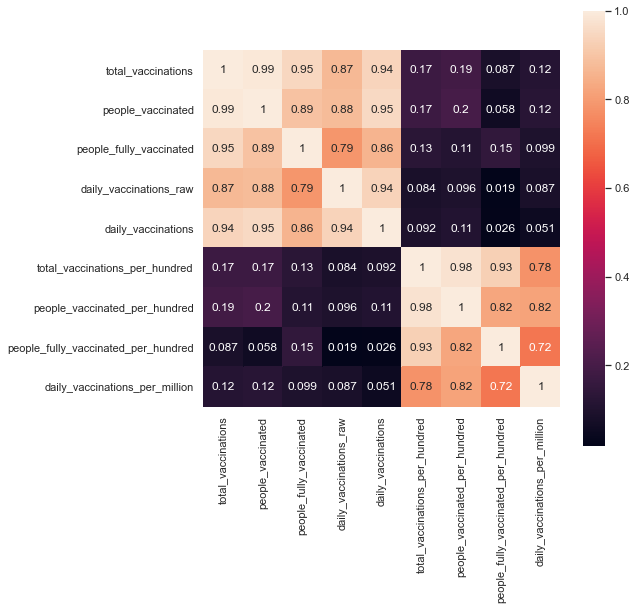

In [39]:
#heatmap for correlation of data:
plt.subplots(figsize=(8, 8))
sns.heatmap(df.corr() , annot=True, square=True )
plt.show()

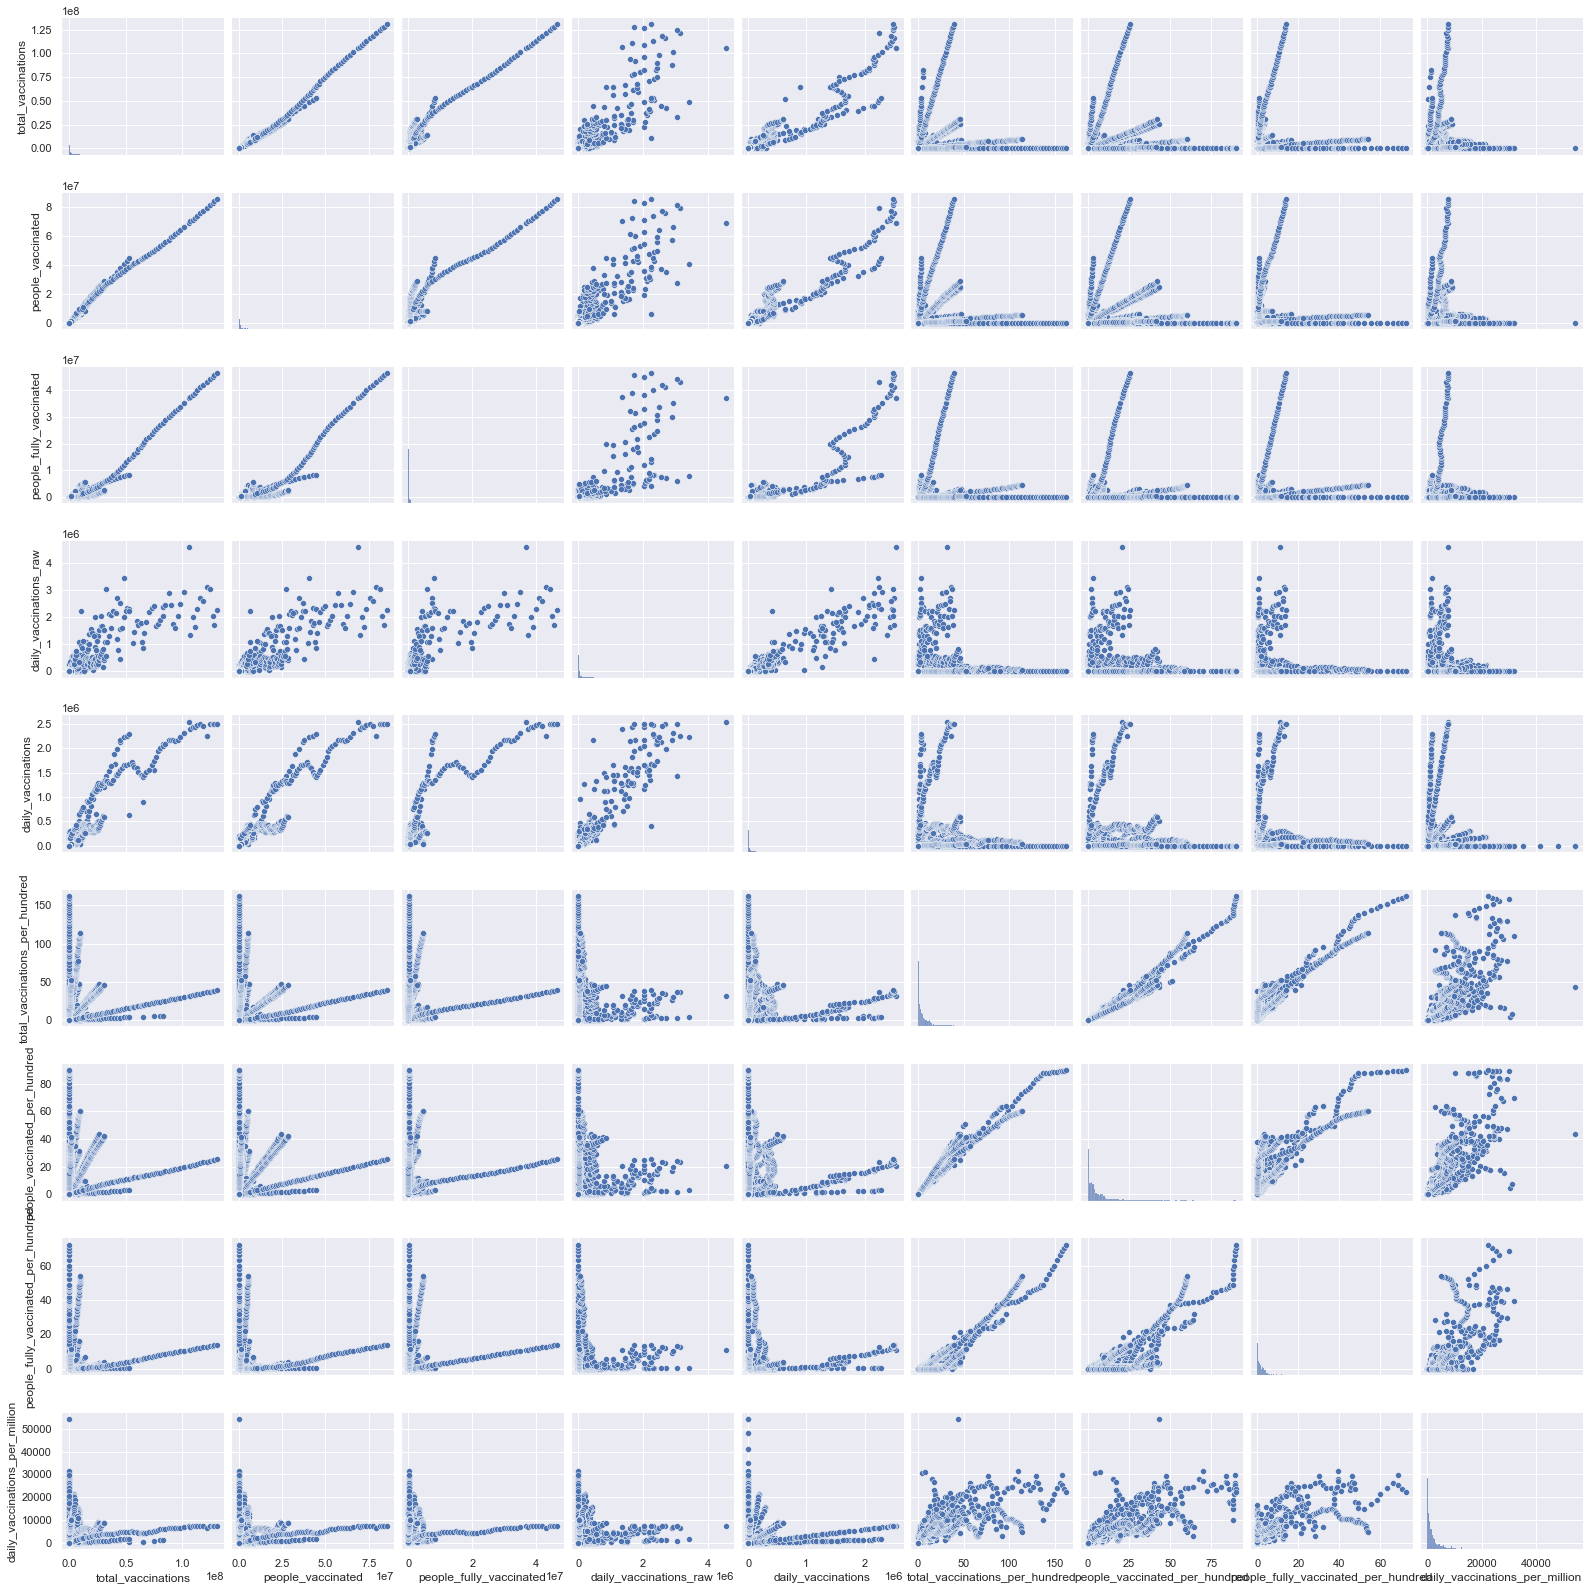

In [40]:
#check correlation of data
sns.pairplot(data=df);

## Feature Engineering

In [41]:
#df1['vaccines'].unique()

In [42]:

df2 = df1.drop('vaccines', axis=1).join(df['vaccines'].str.split(', ', expand=True).stack().reset_index(level=1, drop=True).rename('vaccines'))
df3 = df2[['country', 'date', 'vaccines']]
df3.head()

,country,date,vaccines
1,Afghanistan,2021-02-23,Oxford/AstraZeneca
2,Afghanistan,2021-02-24,Oxford/AstraZeneca
3,Afghanistan,2021-02-25,Oxford/AstraZeneca
4,Afghanistan,2021-02-26,Oxford/AstraZeneca
5,Afghanistan,2021-02-27,Oxford/AstraZeneca


In [43]:
df4 = df3.pivot(index=['country', 'date'], columns='vaccines', values='vaccines').reset_index()
df4.sample(5)

vaccines,country,date,Covaxin,EpiVacCorona,Johnson&Johnson,Moderna,Oxford/AstraZeneca,Pfizer/BioNTech,Sinopharm/Beijing,Sinopharm/Wuhan,Sinovac,Sputnik V
1598,Colombia,2021-03-04,NaN,NaN,NaN,NaN,NaN,Pfizer/BioNTech,NaN,NaN,Sinovac,NaN
2658,Gibraltar,2021-01-24,NaN,NaN,NaN,NaN,NaN,Pfizer/BioNTech,NaN,NaN,NaN,NaN
2566,Germany,2021-01-21,NaN,NaN,NaN,Moderna,Oxford/AstraZeneca,Pfizer/BioNTech,NaN,NaN,NaN,NaN
5455,Poland,2021-01-03,NaN,NaN,NaN,Moderna,Oxford/AstraZeneca,Pfizer/BioNTech,NaN,NaN,NaN,NaN
5834,Russia,2021-01-19,NaN,EpiVacCorona,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sputnik V


In [44]:
lst_ = ['country', 'date', 'vaccines']
df1.drop(lst_, 1, inplace=True)
df1.head(3)

,iso_code,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
1,AFG,NaN,NaN,0.0,1367.0,NaN,NaN,0.0,35.0
2,AFG,NaN,NaN,0.0,1367.0,NaN,NaN,0.0,35.0
3,AFG,NaN,NaN,0.0,1367.0,NaN,NaN,0.0,35.0


In [45]:
df5 = df4.join(df1)
df5.head(3)

,country,date,Covaxin,EpiVacCorona,Johnson&Johnson,Moderna,Oxford/AstraZeneca,Pfizer/BioNTech,Sinopharm/Beijing,Sinopharm/Wuhan,...,Sputnik V,iso_code,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
0,Afghanistan,2021-02-23,NaN,NaN,NaN,NaN,Oxford/AstraZeneca,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,2021-02-24,NaN,NaN,NaN,NaN,Oxford/AstraZeneca,NaN,NaN,NaN,...,NaN,AFG,NaN,NaN,0.0,1367.0,NaN,NaN,0.0,35.0
2,Afghanistan,2021-02-25,NaN,NaN,NaN,NaN,Oxford/AstraZeneca,NaN,NaN,NaN,...,NaN,AFG,NaN,NaN,0.0,1367.0,NaN,NaN,0.0,35.0


In [46]:
#Change NaN in vaccine columns to 0:
df5['Covaxin'] = df5['Covaxin'].fillna(0)
df5['EpiVacCorona'] = df5['EpiVacCorona'].fillna(0)
df5['Johnson&Johnson'] = df5['Johnson&Johnson'].fillna(0)
df5['Moderna'] = df5['Moderna'].fillna(0)
df5['Oxford/AstraZeneca'] = df5['Oxford/AstraZeneca'].fillna(0)
df5['Pfizer/BioNTech'] = df5['Pfizer/BioNTech'].fillna(0)
df5['Sinopharm/Beijing'] = df5['Sinopharm/Beijing'].fillna(0)
df5['Sinopharm/Wuhan'] = df5['Sinopharm/Wuhan'].fillna(0)
df5['Sinovac'] = df5['Sinovac'].fillna(0)
df5['Sputnik V'] = df5['Sputnik V'].fillna(0)

In [47]:
#vaccine_repl(df5)
df5.sample(5)

,country,date,Covaxin,EpiVacCorona,Johnson&Johnson,Moderna,Oxford/AstraZeneca,Pfizer/BioNTech,Sinopharm/Beijing,Sinopharm/Wuhan,...,Sputnik V,iso_code,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
5536,Portugal,2020-12-29,0,0,0,Moderna,0,Pfizer/BioNTech,0,0,...,0,OMN,NaN,NaN,0.0,175.0,NaN,NaN,0.00,34.0
4280,Luxembourg,2021-02-12,0,0,0,Moderna,Oxford/AstraZeneca,Pfizer/BioNTech,0,0,...,0,LBN,40593.0,NaN,0.0,3895.0,0.59,NaN,0.00,571.0
4129,Liechtenstein,2021-03-01,0,0,0,Moderna,0,Pfizer/BioNTech,0,0,...,0,KWT,NaN,NaN,0.0,1121.0,NaN,NaN,0.00,262.0
3735,Japan,2021-03-22,0,0,0,0,0,Pfizer/BioNTech,0,0,...,0,ISR,5407195.0,3384507.0,2022688.0,109997.0,62.47,39.10,23.37,12708.0
3420,Ireland,2021-02-12,0,0,0,Moderna,Oxford/AstraZeneca,Pfizer/BioNTech,0,0,...,0,IND,20922344.0,17168303.0,3754041.0,954257.0,1.52,1.24,0.27,691.0


In [48]:
#Change vaccine names to 1:
df5['Covaxin'] = df5['Covaxin'].replace(['Covaxin'],1)
df5['EpiVacCorona'] = df5['EpiVacCorona'].replace(['EpiVacCorona'],1)
df5['Johnson&Johnson'] = df5['Johnson&Johnson'].replace(['Johnson&Johnson'],1)
df5['Moderna'] = df5['Moderna'].replace(['Moderna'],1)
df5['Oxford/AstraZeneca'] = df5['Oxford/AstraZeneca'].replace(['Oxford/AstraZeneca'],1)

df5['Pfizer/BioNTech'] = df5['Pfizer/BioNTech'].replace(['Pfizer/BioNTech'],1)
df5['Sinopharm/Beijing'] = df5['Sinopharm/Beijing'].replace(['Sinopharm/Beijing'],1)
df5['Sinopharm/Wuhan'] = df5['Sinopharm/Wuhan'].replace(['Sinopharm/Wuhan'],1)
df5['Sinovac'] = df5['Sinovac'].replace(['Sinovac'],1)
df5['Sputnik V'] = df5['Sputnik V'].replace(['Sputnik V'],1)

In [49]:
#Number of countries included in dataset:
df6 = df5.copy()
df6 = df6.set_index(['date'])
ncountry = df6['country'].nunique()
print(F'{ncountry} countries are included in the Covid-19 vaccination progress dataset.')

144 countries are included in the Covid-19 vaccination progress dataset.


In [50]:
#Create list with countries per region, create new column in df6 and map region to country:
Africa = ('Algeria','Angola','Chad', "Cote d'Ivoire",'Egypt','Equatorial Guinea','Ghana','Guinea','Kenya','Malawi','Maldives','Mali','Mauritius','Morocco','Mozambique','Namibia','Niger','Nigeria','Rwanda','Sao Tome and Principe', 'Senegal','Seychelles','Sierra Leone','Somalia','South Africa','South Sudan','Sudan','Swaziland','Tanzania','Togo','Tunisia','Uganda','Western Sahara', 'Zambia','Zimbabwe')

Asia = ('Afghanistan','Azerbaijan','Bangladesh','Bhutan','Brunei','Cambodia','China','East Timor','Hong Kong','India','Indonesia','Japan','Kazakhstan','Kyrgyzstan','Laos','Macao','Malaysia','Maldives','Mongolia','Myanmar','Nepal','North Korea','Pakistan','Philippines','Russia','Singapore','South Korea','Sri Lanka','Taiwan','Tajikistan','Thailand','Turkmenistan','Uzbekistan','Vietnam')
    
Middle_East = ('Bahrain','Iran','Iraq','Israel','Jordan','Kuwait','Lebanon','Oman','Qatar','Saudi Arabia','Syria','Turkey','United Arab Emirates','Yemen')
   
Europe = ('Albania','Andorra','Armenia','Austria','Belarus','Belgium','Bosnia and Herzegovina','Bulgaria','Croatia','Cyprus','Czechia','Denmark','Estonia','Faeroe Islands','Finland','France','Georgia','Germany','Greece','Greenland','Hungary','Iceland','Ireland','Italy','Latvia','Liechtenstein','Lithuania','Luxembourg','Macedonia','Malta','Moldova','Monaco','Montenegro','Netherlands','North Macedonia','Northern Cyprus','Norway','Poland','Portugal','Romania','San Marino','Serbia','Slovakia','Slovenia','Spain','Sweden','Switzerland','Ukraine','Vatican City')

UK_BritishOversea= ('United Kingdom','Anguilla','Antigua and Barbuda','Bermuda','Cayman Islands','Falkland Islands','Gibraltar','Guernsey','Isle of Man','Jersey', 'Montserrat', 'Saint Helena', 'Turks and Caicos Islands')

North_America = ('Canada','United States')
Central_America_Caribic = ('Antigua and Barbuda','Bahamas','Barbados','Belize','Costa Rica','Cuba','Dominica','Dominican Republic','El Salvador','Grenada','Guatemala','Haiti','Honduras','Jamaica','Mexico','Nicaragua','Panama','Saint Kitts and Nevis','Saint Lucia','Saint Vincent and the Grenadines','Trinidad and Tobago')
South_America = ('Argentina','Bolivia','Brazil','Chile','Colombia','Ecuador','Guyana','Paraguay','Peru','Suriname','Uruguay','Venezuela')
Australia_Oceania = ('Australia','Fiji','Kiribati','Marshall Islands','Micronesia','Nauru','New Zealand','Palau','Papua New Guinea','Samoa','Solomon Islands','Tonga','Tuvalu','Vanuatu')


continents = {country: 'Asia' for country in Asia}
continents.update({country: 'Europe' for country in Europe})
continents.update({country: 'Africa' for country in Africa})
continents.update({country: 'Middle_East' for country in Middle_East})
continents.update({country: 'UK_BritishOversea' for country in UK_BritishOversea})
continents.update({country: 'North_America' for country in North_America})
continents.update({country: 'Central_America_Caribic' for country in Central_America_Caribic})
continents.update({country: 'South_America' for country in South_America})
continents.update({country: 'Australia_Oceania' for country in Australia_Oceania})

df6['cgrouped'] = df6['country'].map(continents)



## Exploratory Data Analysis

Answering the following Questions:
- Which country is the fastest with vaccinating its people?
- Which country vaccinated the most (absolute)?
- Which vaccines are used more often (information not available by quantity only as combination with all used vaccines per country?# noch offen
- How looks the vaccination progress by region?

In [51]:
#check correlation of data
#sns.pairplot(data=df5)

## Groupby Countries & Regions

In [52]:
#Create a dataframe that gets the maximum value of total vaccinations and group by country
df2_total_vac = pd.DataFrame(df2.groupby(["country",'vaccines'])["people_vaccinated"].max())

# Resetting indexes to use the data frame in merge function

df2_total_vac.reset_index(level=0, inplace=True)
df2_total_vac.reset_index(level=0, inplace=True)


df2_total_vac.head()

,vaccines,country,people_vaccinated
0,Oxford/AstraZeneca,Afghanistan,54000.0
1,Pfizer/BioNTech,Albania,6073.0
2,Sputnik V,Algeria,NaN
3,Pfizer/BioNTech,Andorra,7098.0
4,Oxford/AstraZeneca,Angola,87022.0


### Which country is the fastest with vaccinating its people?

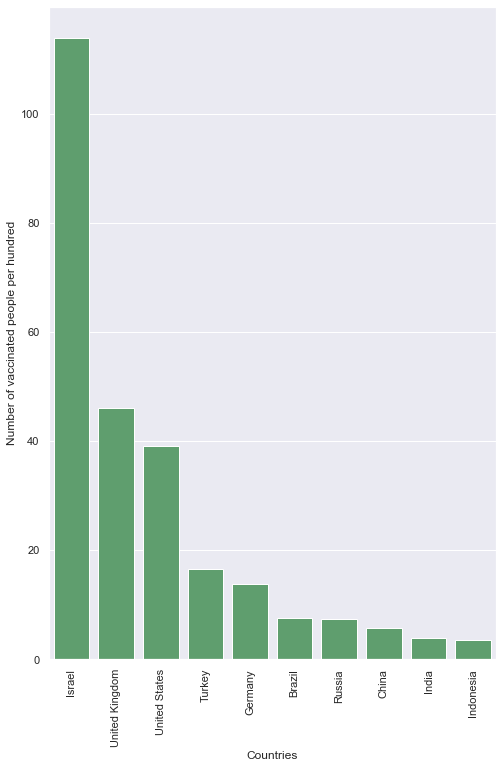

In [53]:
col_vacc = ['country', 'total_vaccinations', 'vaccines','total_vaccinations_per_hundred']
vacc_am_bycountry = df2[col_vacc].groupby('country').max().sort_values('total_vaccinations', ascending=False).dropna(subset=['total_vaccinations'])
vacc_am_bycountry = vacc_am_bycountry.iloc[:10]

vacc_am_bycountry = vacc_am_bycountry.sort_values('total_vaccinations_per_hundred', ascending=False)

plt.figure(figsize=(8, 12))
sns.barplot(vacc_am_bycountry.index, vacc_am_bycountry.total_vaccinations_per_hundred, color = 'g')

plt.ylabel('Number of vaccinated people per hundred')
plt.xlabel('Countries')
plt.xticks(rotation=90);
plt.show()

Until 24.03.2021 Israel is clearly leading in vaccinating its citizens. Followed by UK and the United States. 

### Which country vaccinated the most (absolute)?

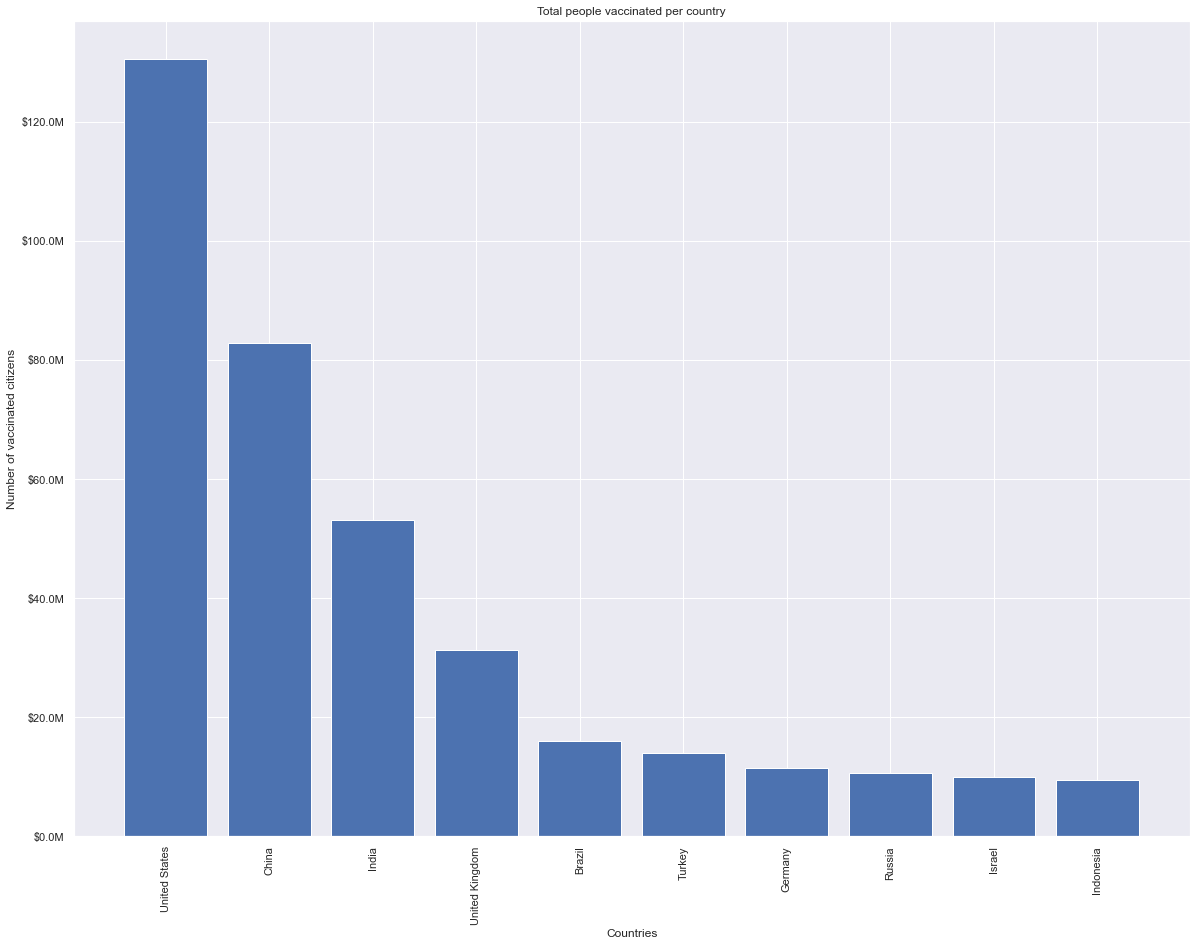

In [54]:
col_vacc = ['country', 'total_vaccinations', 'vaccines']
vacc_am_bycountry = df2[col_vacc].groupby('country').max().sort_values('total_vaccinations', ascending=False).dropna(subset=['total_vaccinations'])
vacc_am_bycountry = vacc_am_bycountry.iloc[:10]

fig, ax = plt.subplots()

plt.bar(vacc_am_bycountry.index, vacc_am_bycountry.total_vaccinations, color = 'b')

def millions(x, pos):
    'The two args are the value and tick position'
    return '$%1.1fM' % (x*1e-6)

formatter = FuncFormatter(millions)

plt.title('Total people vaccinated per country')

ax.yaxis.set_major_formatter(formatter)
plt.xticks(rotation = 90)
plt.ylabel('Number of vaccinated citizens')
plt.xlabel('Countries')
plt.show();

The United States vaccinated 130 M citizens, China vaccinated over 80 M citizens and India around 50 M citizens.

### Which country vaccinated most of its citizens?

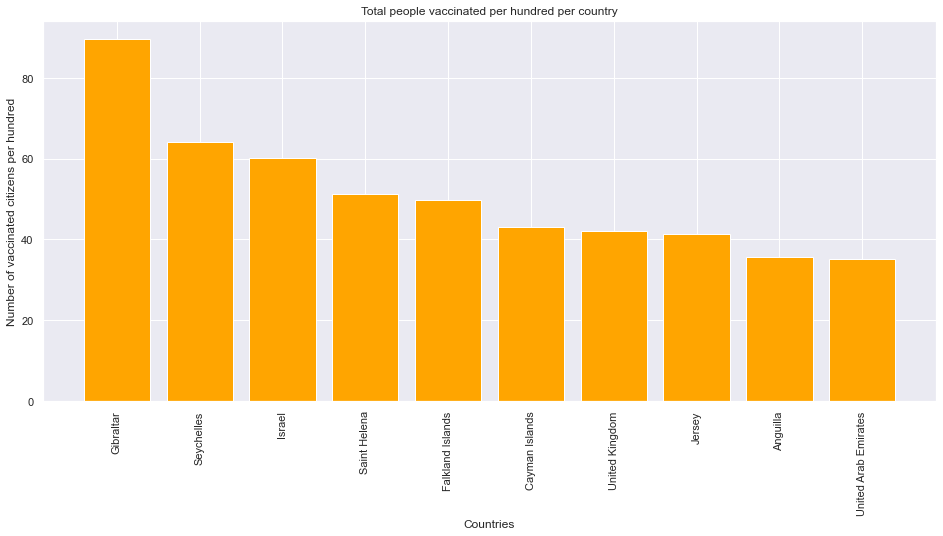

In [55]:
#plot people vaccinated per hundred by country:
col_vacc = ['country', 'people_vaccinated_per_hundred', 'vaccines']
vacc_am_bycountry = df2[col_vacc].groupby('country').max().sort_values('people_vaccinated_per_hundred', ascending=False).dropna(subset=['people_vaccinated_per_hundred'])
vacc_am_bycountry = vacc_am_bycountry.iloc[:10]

plt.figure(figsize=(16, 7))
plt.bar(vacc_am_bycountry.index, vacc_am_bycountry.people_vaccinated_per_hundred, color = 'orange')

plt.title('Total people vaccinated per hundred per country')
plt.xticks(rotation = 90)
plt.ylabel('Number of vaccinated citizens per hundred')
plt.xlabel('Countries')
plt.show();




Until 24.03.2021 Gibraltar has most of its citizens vaccinated, followed by Seychelles, Israel and UK with British Oversea(Saint Helena, Falkland Islands, Cayman Islands, Jersey, Anguilla).

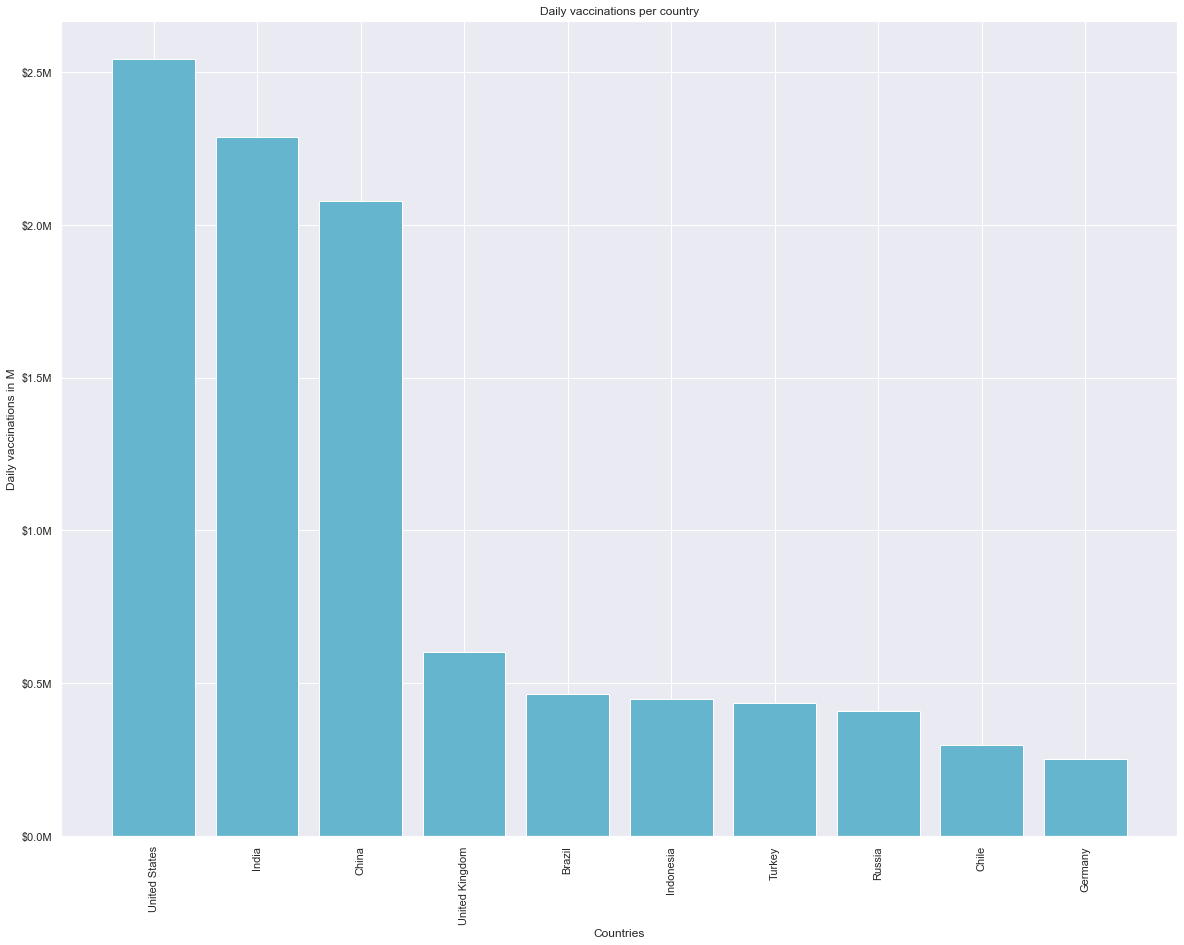

In [56]:
#Groupby daily vaccinations

col_vacc = ['country', 'daily_vaccinations', 'vaccines']
vacc_am_bycountry = df2[col_vacc].groupby('country').max().sort_values('daily_vaccinations', ascending=False).dropna(subset=['daily_vaccinations'])
vacc_am_bycountry = vacc_am_bycountry.iloc[:10]

fig, ax = plt.subplots()
#plt.figure(figsize=(16, 7))
plt.bar(vacc_am_bycountry.index, vacc_am_bycountry.daily_vaccinations, color = 'c')

def millions(x, pos):
    'The two args are the value and tick position'
    return '$%1.1fM' % (x*1e-6)

formatter = FuncFormatter(millions)



ax.yaxis.set_major_formatter(formatter)

plt.title('Daily vaccinations per country')
plt.xticks(rotation = 90)
plt.ylabel('Daily vaccinations in M')
plt.xlabel('Countries')
plt.show();

United Stated vaccinates over 2.5 M people daily, Germany is only around 250.000 but still in the Top 10.

ab hier noch aufräumen....

### How looks the vaccination progress by region?

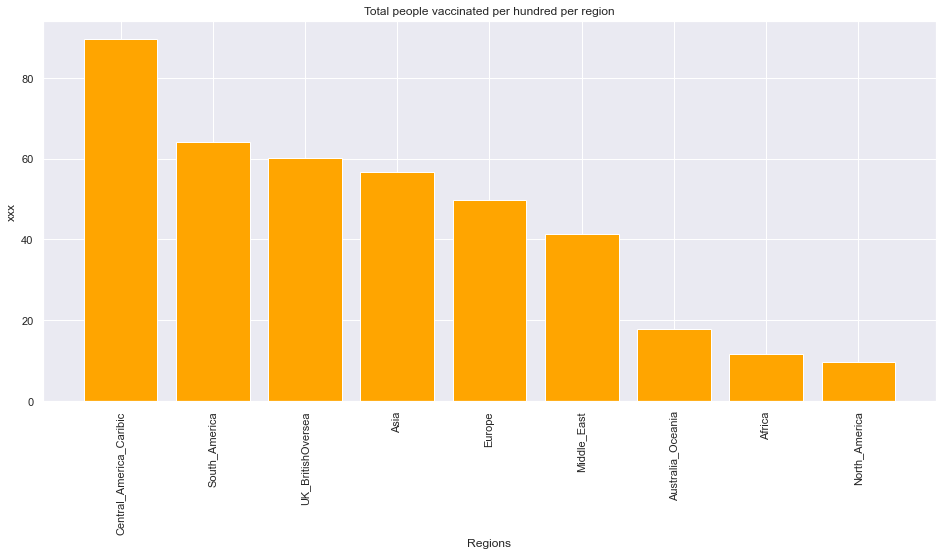

In [57]:
#Groupby regions:
#people_vacc_by_region = df6.groupby('cgrouped').nth(-1)#['date'].tail#[-1]
#total_vaccinations_per_hundred= df6.loc['2021-03-24']#.groupby('cgrouped')
#total_vaccinations_per_hundred= total_vaccinations_per_hundred.groupby('cgrouped')
#print(total_vaccinations_per_hundred)
#sns.barplot(x='cgrouped', y='total_vaccinations_per_hundred', data = total_vaccinations_per_hundred)
#plt.title('Total vaccinations per hundred')
#plt.xlabel('Region')
#plt.ylabel('Total vaccinations per hundred until 24-03-2021')
#plt.xticks(rotation=90);


col_vacc = ['cgrouped', 'people_vaccinated_per_hundred']
vacc_am_bycountry = df6[col_vacc].groupby('cgrouped').max().sort_values('people_vaccinated_per_hundred', ascending=False).dropna(subset=['people_vaccinated_per_hundred'])
vacc_am_bycountry = vacc_am_bycountry.iloc[:10]

plt.figure(figsize=(16, 7))
plt.bar(vacc_am_bycountry.index, vacc_am_bycountry.people_vaccinated_per_hundred, color = 'orange')

plt.title('Total people vaccinated per hundred per region')
plt.xticks(rotation = 90)
plt.ylabel('xxx')
plt.xlabel('Regions')
plt.show();

Who is so fast in Central America/Caribic and South America --> check

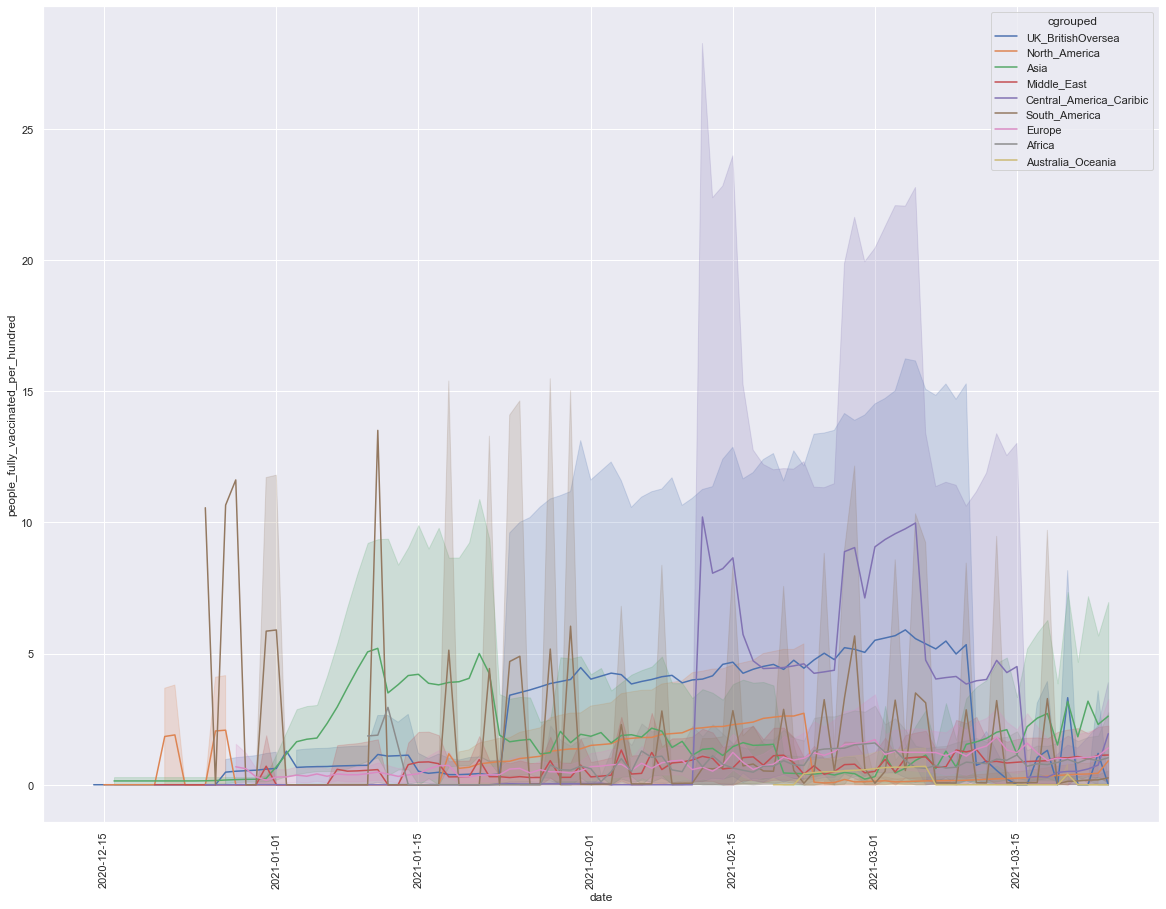

In [58]:
#Region plot as lineplot
graph = sns.lineplot(data=df6.sort_values(by="date"), x="date", y="people_fully_vaccinated_per_hundred",hue='cgrouped')
#graph.xaxis.set_major_locator(mdates.DayLocator(interval = 7))
# graph.xaxis.set_major_formatter(mdates.DateFormatter('%Y:%M:%D'))
plt.xticks(rotation = 90)

plt.show()

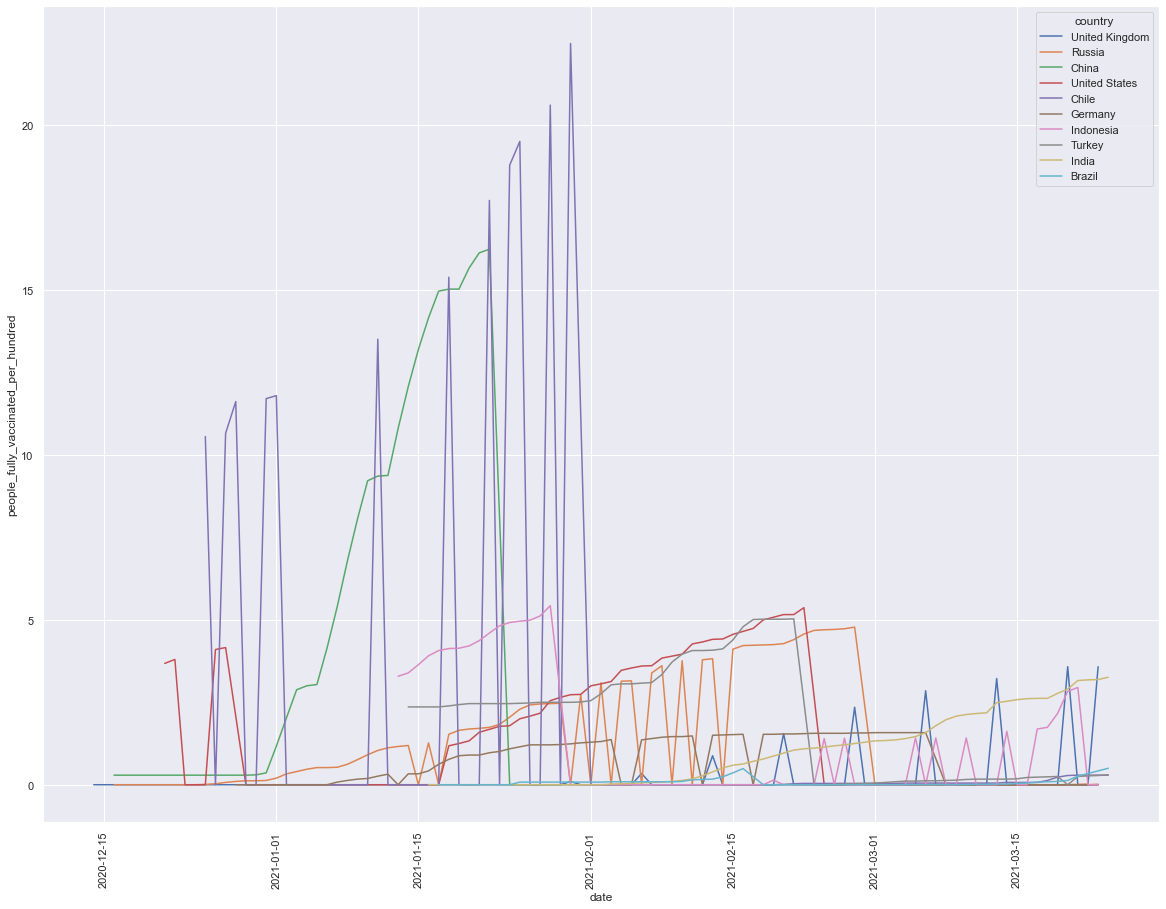

In [59]:
#Region plot as lineplot

#Selecting required columns:
cols = ['country', 'date', 'people_fully_vaccinated_per_hundred']
df6_line = df6.reset_index()
#List of top 10 countries from above:
top10_countries = ['United States', 'India', 'China', 'United Kingdom', 'Brazil', 'Indonesia', 'Turkey', 'Russia', 'Chile', 'Germany']

# Filtering and sorting the data

df6_line1 = df6_line[['country', 'date', 'people_fully_vaccinated_per_hundred']].sort_values(by='people_fully_vaccinated_per_hundred', ascending=True)

df6_line1_top10 = df6_line1[df6_line1.country.isin(top10_countries)].dropna()


graph = sns.lineplot(data=df6_line1_top10.sort_values(by="date"), x="date", y="people_fully_vaccinated_per_hundred",hue='country')

plt.xticks(rotation = 90)

plt.show()

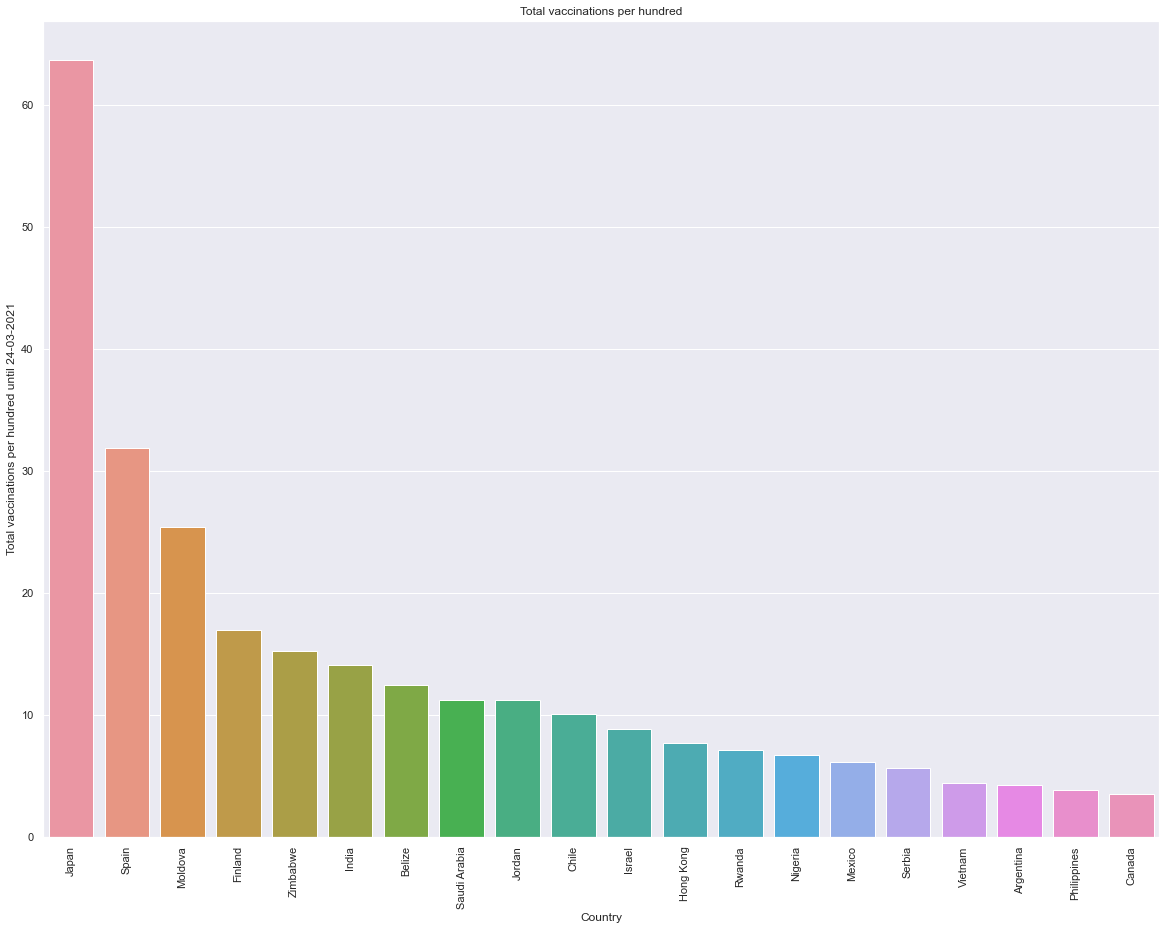

In [60]:
#Groupby regions:
#people_vacc_by_region = df6.groupby('cgrouped').nth(-1)#['date'].tail#[-1]
total_vaccinations_per_hundred= df6.loc['2021-03-24'].nlargest(20,'total_vaccinations_per_hundred')#.groupby('cgrouped')
#total_vaccinations_per_hundred= total_vaccinations_per_hundred.groupby('cgrouped')
#print(total_vaccinations_per_hundred)
sns.barplot(x='country', y='total_vaccinations_per_hundred', data = total_vaccinations_per_hundred)
plt.title('Total vaccinations per hundred')
plt.xlabel('Country')
plt.ylabel('Total vaccinations per hundred until 24-03-2021')
plt.xticks(rotation=90);

change format and check

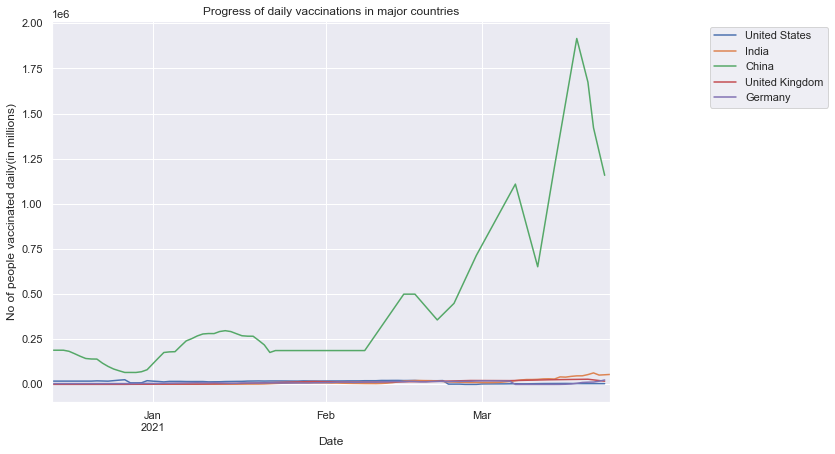

In [61]:
# daily Vaccination progress of major countries???
data2 = df6.pivot_table(index = "date", columns = "country", values = "daily_vaccinations")
data2[["United States", "India","China", "United Kingdom", "Germany"]].replace(0, np.nan).fillna(method = "bfill", axis = 0).plot(xlabel= "Date", ylabel = "No of people vaccinated daily(in millions)", title = "Progress of daily vaccinations in major countries", figsize = (10,7))
plt.legend(loc = "upper right", bbox_to_anchor = (1.4, 1))
sns.set_style("whitegrid")

different plot for China?

In [62]:
group_c = df6.groupby('country')
group_c1 = group_c['total_vaccinations_per_hundred'].nsmallest(20)
print(group_c1)
#df6['total_vaccinations_per_hundred'].nlargest(20).groupby(df6['country'])

country      date      
Afghanistan  2021-03-01     0.02
Albania      2021-01-14     0.00
             2021-01-15     0.01
             2021-01-16     0.01
             2021-01-17     0.01
                           ...  
Zimbabwe     2021-03-06    10.40
             2021-03-07    10.76
             2021-03-08    11.05
             2021-03-09    11.34
             2021-03-10    11.57
Name: total_vaccinations_per_hundred, Length: 2119, dtype: float64


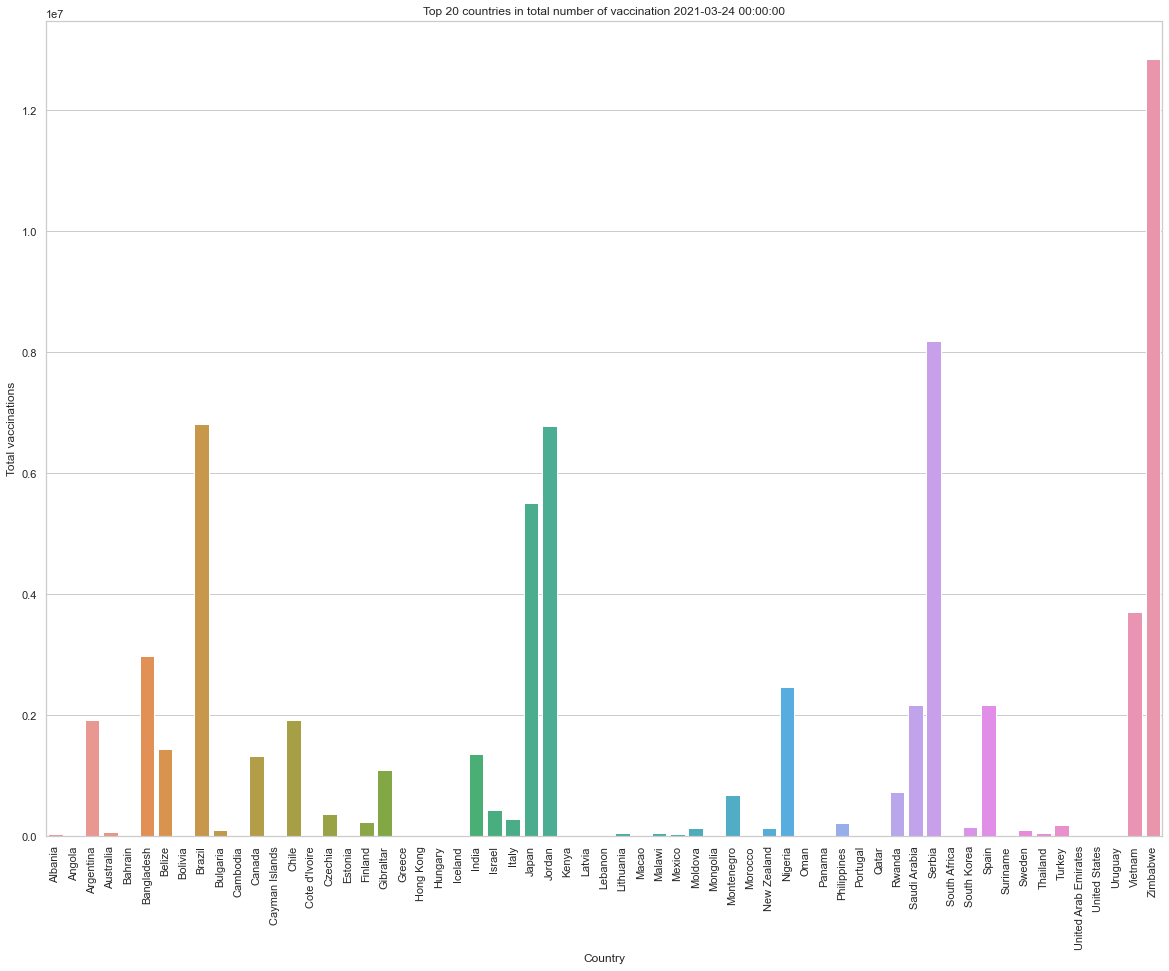

In [63]:
#Number of total vaccinations until 24-03-2021:
data = df6.loc['2021-03-24']
data = data[['country','total_vaccinations']]
sns.barplot(x = 'country', y= 'total_vaccinations', data = data)
d= df2['date'].iloc[-1]
plt.title(f"Top 20 countries in total number of vaccination {d}") 
plt.xlabel('Country')
plt.ylabel('Total vaccinations')
plt.xticks(rotation=90);

In [64]:
#df6.columns.tolist()

In [65]:
#lst_vaccine = [df7['Covaxin'], df7['EpiVacCorona'], df7['Johnson&Johnson'], df7['Moderna'], df7['Oxford/AstraZeneca'], df7['Pfizer/BioNTech'], df7['Sinopharm/Beijing'], df7['Sinopharm/Wuhan'], df7['Sinovac'], df7['Sputnik V']]

In [66]:
#data = df[['country','total_vaccinations']].nlargest(20,'total_vaccinations')
#fig = px.bar(data, x = 'country',y = 'total_vaccinations',title="Number of total vaccinations according to countries")
#fig.show();

In [67]:
#daily vaccinations in %
df6['daily_vaccinations_per_hundred'] = df6['daily_vaccinations_per_million']/10000
df6.head(3)

,country,Covaxin,EpiVacCorona,Johnson&Johnson,Moderna,Oxford/AstraZeneca,Pfizer/BioNTech,Sinopharm/Beijing,Sinopharm/Wuhan,Sinovac,...,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,cgrouped,daily_vaccinations_per_hundred
date,,,,,,,,,,,,,,,,,,,,,
2021-02-23,Afghanistan,0,0,0,0,1,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Asia,NaN
2021-02-24,Afghanistan,0,0,0,0,1,0,0,0,0,...,NaN,NaN,0.0,1367.0,NaN,NaN,0.0,35.0,Asia,0.0035
2021-02-25,Afghanistan,0,0,0,0,1,0,0,0,0,...,NaN,NaN,0.0,1367.0,NaN,NaN,0.0,35.0,Asia,0.0035


In [68]:
lst_vaccines = df3['vaccines']
vaccince_types = df3.groupby(lst_vaccines)['country'].unique()
vaccince_types = vaccince_types.reset_index()
vaccince_types

,vaccines,country
0,Covaxin,[India]
1,EpiVacCorona,[Russia]
2,Johnson&Johnson,"[South Africa, United States]"
3,Moderna,"[Austria, Belgium, Bulgaria, Canada, Czechia, ..."
4,Oxford/AstraZeneca,"[Afghanistan, Angola, Anguilla, Antigua and Ba..."
5,Pfizer/BioNTech,"[Albania, Andorra, Australia, Austria, Bahrain..."
6,Sinopharm/Beijing,"[Argentina, Bahrain, Cambodia, China, Egypt, E..."
7,Sinopharm/Wuhan,"[China, United Arab Emirates]"
8,Sinovac,"[Azerbaijan, Brazil, Chile, China, Colombia, D..."
9,Sputnik V,"[Algeria, Argentina, Bahrain, Belarus, Bolivia..."


In [69]:
df_countries = df2.groupby(['country', 'vaccines'])['total_vaccinations','people_vaccinated','people_fully_vaccinated', 'daily_vaccinations','total_vaccinations_per_hundred','people_vaccinated_per_hundred',
                                           'people_fully_vaccinated_per_hundred','daily_vaccinations_per_million'].max().reset_index()
df_countries.head()

,country,vaccines,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
0,Afghanistan,Oxford/AstraZeneca,54000.0,54000.0,0.0,2862.0,0.14,0.14,0.00,74.0
1,Albania,Pfizer/BioNTech,53992.0,6073.0,655.0,2946.0,1.88,0.21,0.02,1024.0
2,Algeria,Sputnik V,75000.0,NaN,0.0,3748.0,0.17,NaN,0.00,85.0
3,Andorra,Pfizer/BioNTech,9288.0,7098.0,1265.0,679.0,12.02,9.19,1.64,8788.0
4,Angola,Oxford/AstraZeneca,87022.0,87022.0,0.0,6044.0,0.26,0.26,0.00,184.0


In [70]:
 EU_countries = ['Austria', 'Belgium','Bulgaria','Croatia','Cyprus','Czechia','Denmark','Estonia','Finland','France','Germany','Greece','Hungary','Ireland','Italy','Latvia','Lithuania','Luxembourg','Malta','Netherlands','Poland','Portugal','Romania','Slovakia','Slovenia','Spain','Sweden']

In [71]:
#Vaccination rates in Europe vs. UK:
df_countries1 = df.filter('EU_countries')
print(df_countries1)
#data = df_countries1[['country', 'people_fully_vaccinated_per_hundred']].nlargest(20,'people_fully_vaccinated_per_hundred')
#sns.barplot(x = 'country', y= 'people_fully_vaccinated_per_hundred', data = data)
#d= df['date'].iloc[-1]
#plt.title(f"Top 20 countries leading with vaccination progress until {d}") 
#plt.xticks(rotation=90);

Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...]

[8079 rows x 0 columns]


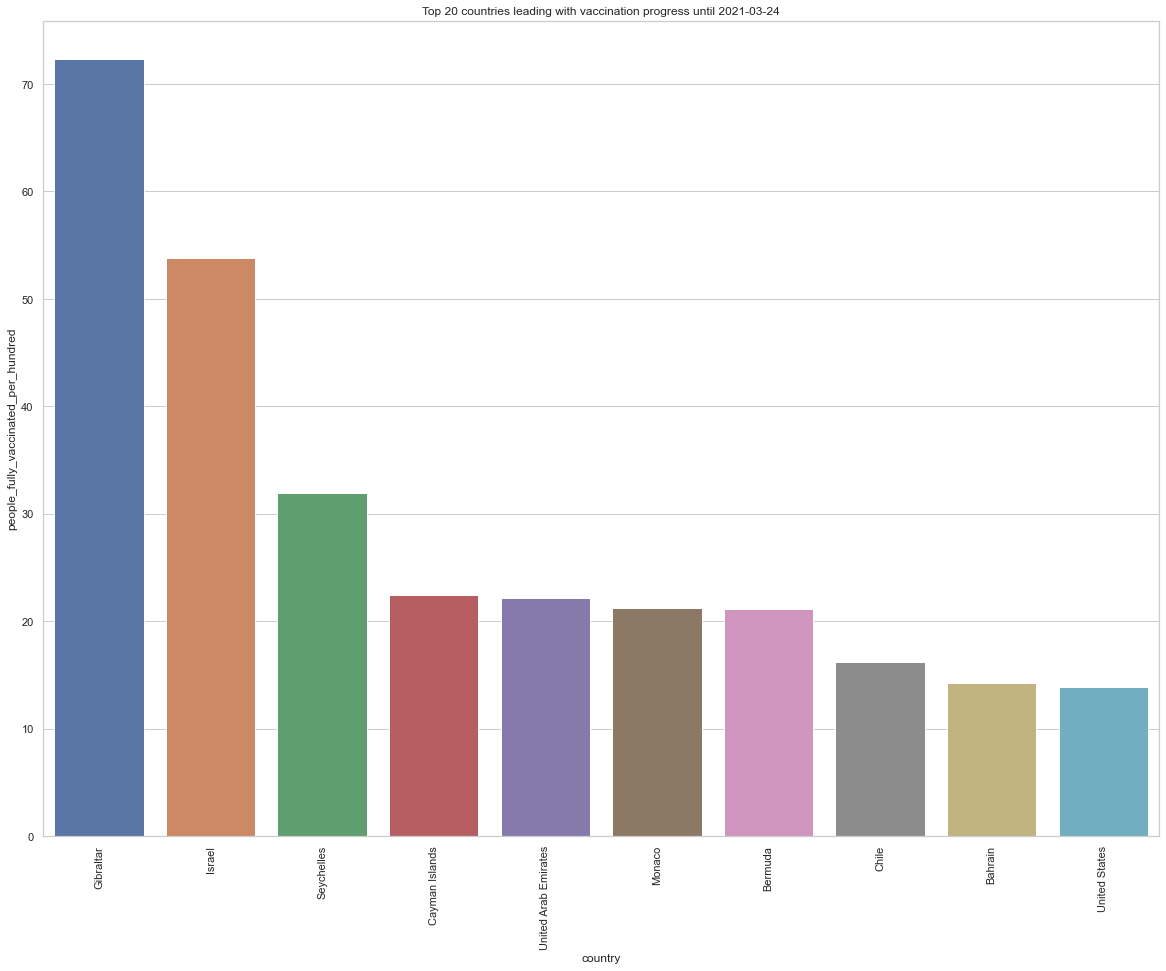

In [72]:
#Top 20 Vaccination rates worldwide:
data = df_countries[['country','people_fully_vaccinated_per_hundred']].nlargest(20,'people_fully_vaccinated_per_hundred')
sns.barplot(x = 'country', y= 'people_fully_vaccinated_per_hundred', data = data)
d= df['date'].iloc[-1]
plt.title(f"Top 20 countries leading with vaccination progress until {d}") 
plt.xticks(rotation=90);

In [73]:
#Top 20 Vaccination rates worldwide only data from 24.03.2021 used:
#data = df_daily.loc['2021-03-24'][['country','people_fully_vaccinated_per_hundred']].nlargest(20,'people_fully_vaccinated_per_hundred')
#sns.barplot(x = 'country', y= 'people_fully_vaccinated_per_hundred', data = data)
#plt.title(f"Top 20 countries leading with vaccination progress at 24.03.2021") 
#plt.xticks(rotation=90);

In [74]:
#Last 20 Vaccination rates worldwide:
#data = df_countries[['country','people_fully_vaccinated_per_hundred']].nsmallest(20,'people_fully_vaccinated_per_hundred')
#sns.barplot(x = 'country', y= 'people_fully_vaccinated_per_hundred', data = data)
#d= df['date'].iloc[-1]
#plt.title(f"Last 20 countries with vaccination progress until {d}") 
#plt.xticks(rotation=90);

In [75]:
#Nan in total_vaccinations_per_hundred
df7 = df6.copy()
df7.head()

,country,Covaxin,EpiVacCorona,Johnson&Johnson,Moderna,Oxford/AstraZeneca,Pfizer/BioNTech,Sinopharm/Beijing,Sinopharm/Wuhan,Sinovac,...,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,cgrouped,daily_vaccinations_per_hundred
date,,,,,,,,,,,,,,,,,,,,,
2021-02-23,Afghanistan,0,0,0,0,1,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Asia,NaN
2021-02-24,Afghanistan,0,0,0,0,1,0,0,0,0,...,NaN,NaN,0.0,1367.0,NaN,NaN,0.0,35.0,Asia,0.0035
2021-02-25,Afghanistan,0,0,0,0,1,0,0,0,0,...,NaN,NaN,0.0,1367.0,NaN,NaN,0.0,35.0,Asia,0.0035
2021-02-26,Afghanistan,0,0,0,0,1,0,0,0,0,...,NaN,NaN,0.0,1367.0,NaN,NaN,0.0,35.0,Asia,0.0035
2021-02-27,Afghanistan,0,0,0,0,1,0,0,0,0,...,NaN,NaN,0.0,1367.0,NaN,NaN,0.0,35.0,Asia,0.0035


In [76]:
#df7[df7.total_vaccinations.isnull()]


In [77]:
#Change country, iso_code, vaccines to categorical
#df6['country'] = df6['country'].astype('category')

#df6['vaccines'] = df6['vaccines'].astype('category')
#check changes
#df6.info()

## Time series

Analyzing Time series: 
The vaccination progress is reported daily, so that we have timeseries to analyze. First I set a DatetimeIndex as index to our DataFrame.

In [78]:
#import matplotlib.dates as mdates

In [79]:
#%reload_ext autoplot

In [80]:
#%autoplot

In [81]:
##%autoplot -v dtale

In [82]:
#set DatetimeIndex as index for our DataFrame:
df_daily = df6.copy()
#df_daily = df_daily.set_index('date')
df_daily.head(3)

,country,Covaxin,EpiVacCorona,Johnson&Johnson,Moderna,Oxford/AstraZeneca,Pfizer/BioNTech,Sinopharm/Beijing,Sinopharm/Wuhan,Sinovac,...,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,cgrouped,daily_vaccinations_per_hundred
date,,,,,,,,,,,,,,,,,,,,,
2021-02-23,Afghanistan,0,0,0,0,1,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Asia,NaN
2021-02-24,Afghanistan,0,0,0,0,1,0,0,0,0,...,NaN,NaN,0.0,1367.0,NaN,NaN,0.0,35.0,Asia,0.0035
2021-02-25,Afghanistan,0,0,0,0,1,0,0,0,0,...,NaN,NaN,0.0,1367.0,NaN,NaN,0.0,35.0,Asia,0.0035


In [83]:
df_daily.index

DatetimeIndex(['2021-02-23', '2021-02-24', '2021-02-25', '2021-02-26',
               '2021-02-27', '2021-02-28', '2021-03-01', '2021-03-02',
               '2021-03-03', '2021-03-04',
               ...
               '2021-03-15', '2021-03-16', '2021-03-17', '2021-03-18',
               '2021-03-19', '2021-03-20', '2021-03-21', '2021-03-22',
               '2021-03-23', '2021-03-24'],
              dtype='datetime64[ns]', name='date', length=7497, freq=None)

In [84]:
#fig, ax = plt.subplots()
#ax.xaxis.set_major_formatter(mdates.DateFormatter(r"%b\n%Y"))

In [85]:
# Add columns with year, month, and weekday name
df_daily['Year'] = df_daily.index.year
df_daily['Month'] = df_daily.index.month
df_daily['Day'] = df_daily.index.day
#df_daily['Weekday_Name'] = df_daily.index.day_of_week
#TODO: change day of week to name of day
# Display a random sampling of 5 rows
df_daily.sample(5, random_state=0)

,country,Covaxin,EpiVacCorona,Johnson&Johnson,Moderna,Oxford/AstraZeneca,Pfizer/BioNTech,Sinopharm/Beijing,Sinopharm/Wuhan,Sinovac,...,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,cgrouped,daily_vaccinations_per_hundred,Year,Month,Day
date,,,,,,,,,,,,,,,,,,,,,
2021-02-02,Mauritius,0,0,0,0,1,0,0,0,0,...,1606.0,NaN,NaN,0.00,2566.0,Africa,0.2566,2021,2,2
2021-02-09,Finland,0,0,0,1,1,1,0,0,0,...,2196.0,4.03,2.71,1.32,1655.0,Europe,0.1655,2021,2,9
2021-03-11,Mongolia,0,0,0,0,1,0,0,0,0,...,227.0,NaN,NaN,0.00,178.0,Asia,0.0178,2021,3,11
2021-01-08,Luxembourg,0,0,0,1,1,1,0,0,0,...,2782.0,4.33,3.37,0.95,1475.0,Europe,0.1475,2021,1,8
2021-03-11,Qatar,0,0,0,0,0,1,0,0,0,...,99.0,0.02,0.02,0.00,14.0,Middle_East,0.0014,2021,3,11


In [86]:
#Select data for a single day:
df_daily.loc['2021-03-24']

,country,Covaxin,EpiVacCorona,Johnson&Johnson,Moderna,Oxford/AstraZeneca,Pfizer/BioNTech,Sinopharm/Beijing,Sinopharm/Wuhan,Sinovac,...,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,cgrouped,daily_vaccinations_per_hundred,Year,Month,Day
date,,,,,,,,,,,,,,,,,,,,,
2021-03-24,Albania,0,0,0,0,0,1,0,0,0,...,1679.0,1.16,NaN,0.00,583.0,Europe,0.0583,2021,3,24
2021-03-24,Angola,0,0,0,0,1,0,0,0,0,...,3965.0,NaN,NaN,0.00,121.0,Africa,0.0121,2021,3,24
2021-03-24,Argentina,0,0,0,0,1,0,1,0,0,...,95230.0,4.25,3.46,0.78,2107.0,South_America,0.2107,2021,3,24
2021-03-24,Australia,0,0,0,0,1,1,0,0,0,...,6215.0,0.24,0.24,0.00,244.0,Australia_Oceania,0.0244,2021,3,24
2021-03-24,Bahrain,0,0,0,0,1,1,1,0,0,...,7712.0,NaN,17.52,0.00,4532.0,Middle_East,0.4532,2021,3,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-03-24,United Arab Emirates,0,0,0,0,1,1,1,1,0,...,368.0,NaN,NaN,0.00,627.0,Middle_East,0.0627,2021,3,24
2021-03-24,United States,0,0,1,1,0,1,0,0,0,...,NaN,NaN,NaN,NaN,NaN,North_America,NaN,2021,3,24
2021-03-24,Uruguay,0,0,0,0,0,1,0,0,1,...,2630.0,0.19,0.19,0.00,223.0,South_America,0.0223,2021,3,24


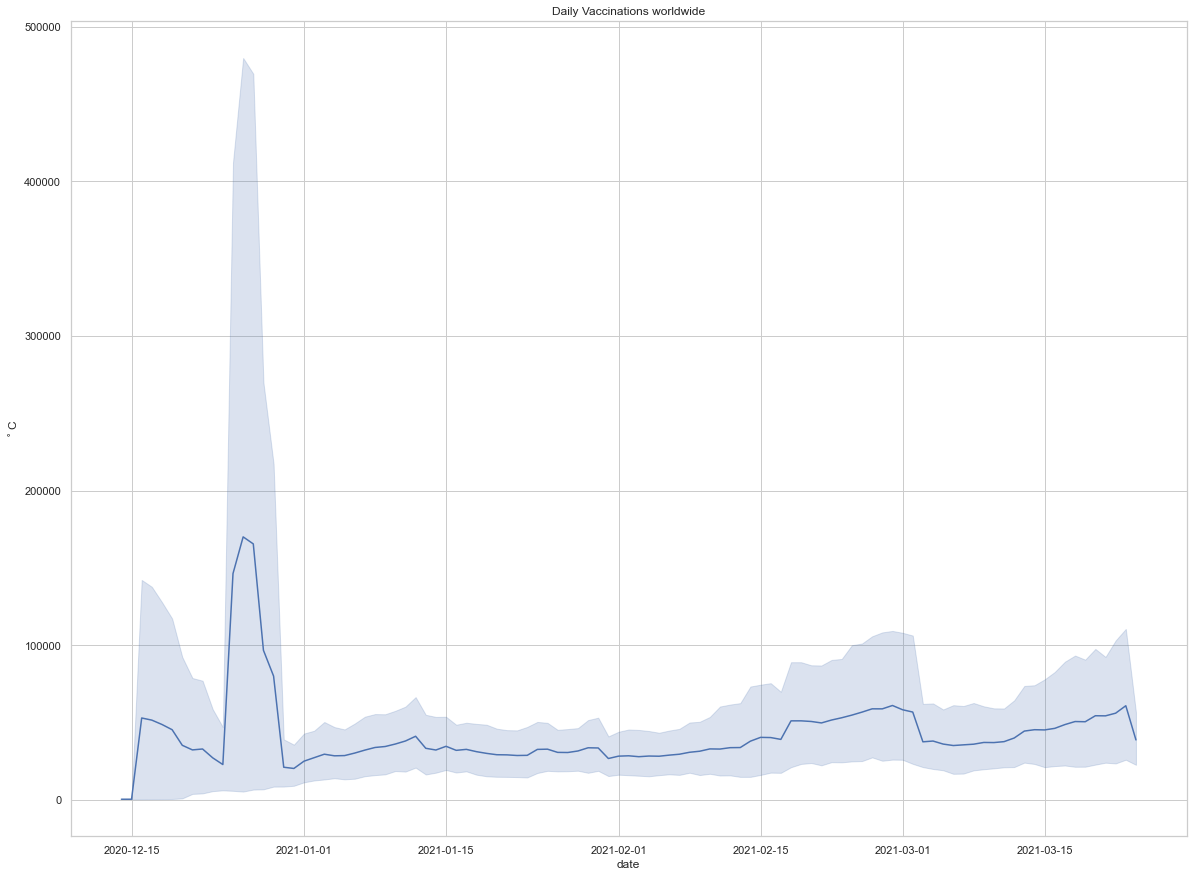

In [87]:
fig, ax = plt.subplots()
sns.lineplot(x='date', y='daily_vaccinations', data=df_daily, ax=ax)#, hue=('country' == 'Germany'
ax.set(title='Daily Vaccinations worldwide', ylabel=r'$^\circ$C');

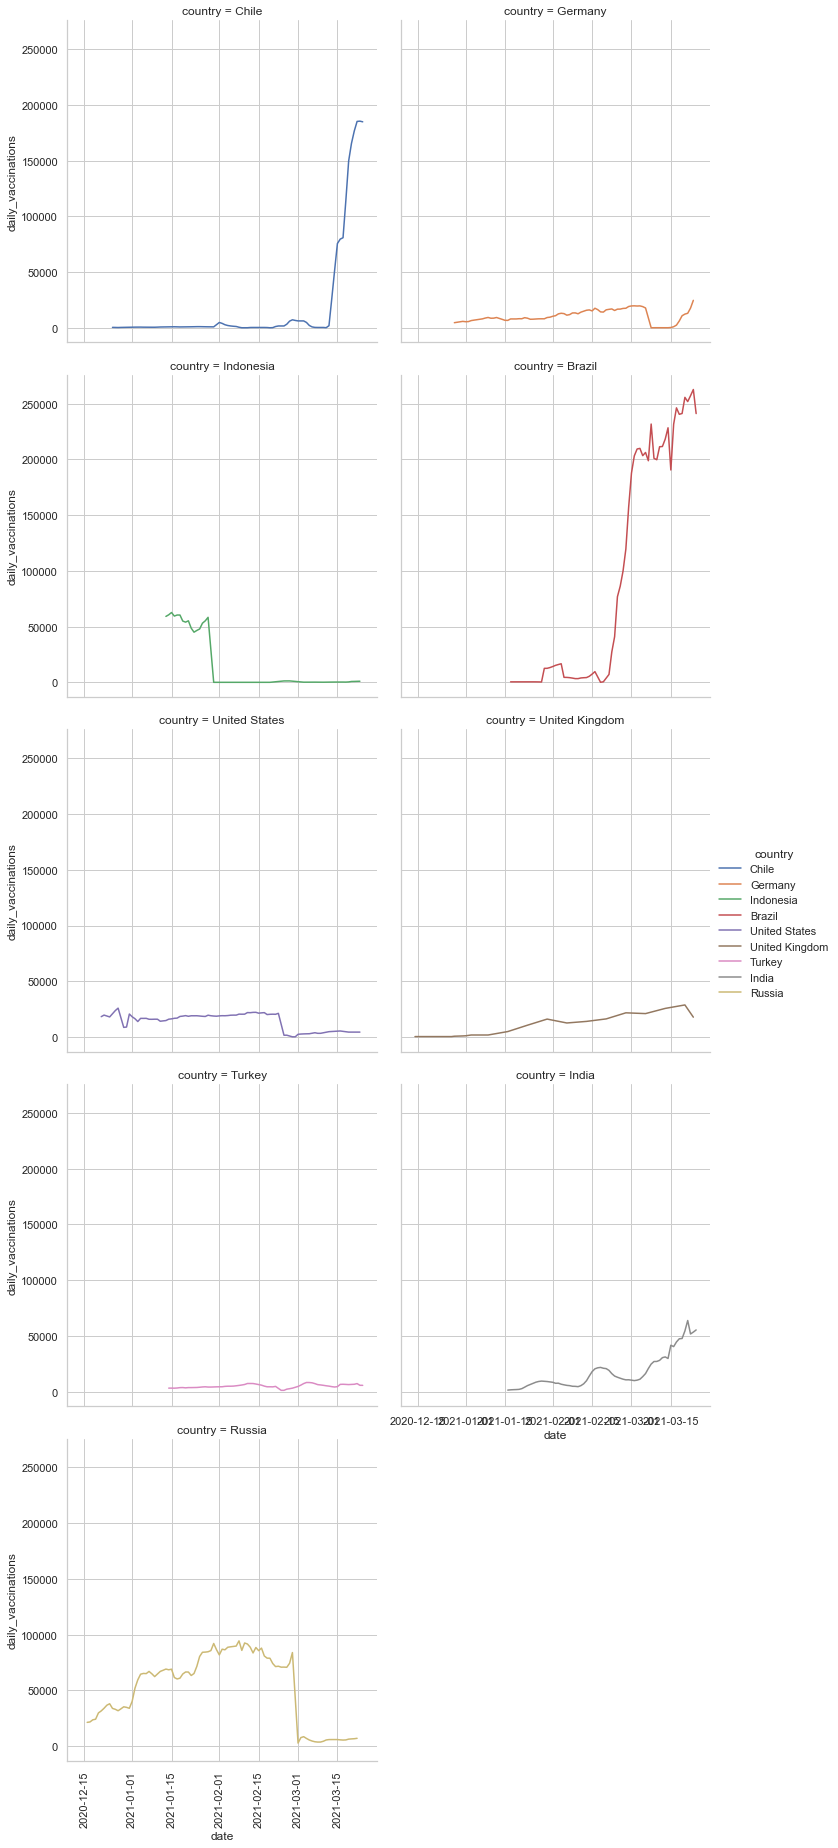

In [88]:
# checking daily vaccinations for Top 10 countries:
#Selecting required columns:
cols = ['country', 'date', 'daily_vaccinations']
df_daily1 = df_daily.reset_index()
#List of top 10 countries from above:
top10_countries = ['United States', 'India', 'United Kingdom', 'Brazil', 'Indonesia', 'Turkey', 'Russia', 'Chile', 'Germany']#'China', 

# Filtering and sorting the data

daily_vacc = df_daily1[['country', 'date', 'daily_vaccinations']].sort_values(by='daily_vaccinations', ascending=True)

daily_vacc_top10 = daily_vacc[daily_vacc.country.isin(top10_countries)].dropna()

#display(daily_vacc_top10) # verifying that the filtering executed correctly

# Plotting the data in a multi faceted lineplot

#plt.figure(figsize=(18, 32))

sns.relplot(data=daily_vacc_top10, x='date', y='daily_vaccinations', hue='country', col='country', kind='line', col_wrap=2)
#sns.lineplot(data=daily_vacc_top10, x='date', y='daily_vaccinations', hue='country')
plt.xticks(rotation=90);
#plt.xticks('');

auf Zeit ab Februar - März eingrenzen?
China verzerrt - was tun?
warum hat Russland am 01.03 so einen Sprung nach unten? Sind schon so viele geimpft, wie sehen die Infektionszahlen aus?

In [89]:
#
df_daily.loc['2021-01-01':'2021-01-31']

,country,Covaxin,EpiVacCorona,Johnson&Johnson,Moderna,Oxford/AstraZeneca,Pfizer/BioNTech,Sinopharm/Beijing,Sinopharm/Wuhan,Sinovac,...,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,cgrouped,daily_vaccinations_per_hundred,Year,Month,Day
date,,,,,,,,,,,,,,,,,,,,,
2021-01-11,Albania,0,0,0,0,0,1,0,0,0,...,2862.0,0.14,0.14,0.00,74.0,Europe,0.0074,2021,1,11
2021-01-12,Albania,0,0,0,0,0,1,0,0,0,...,NaN,NaN,NaN,NaN,NaN,Europe,NaN,2021,1,12
2021-01-13,Albania,0,0,0,0,0,1,0,0,0,...,64.0,NaN,NaN,0.00,22.0,Europe,0.0022,2021,1,13
2021-01-14,Albania,0,0,0,0,0,1,0,0,0,...,64.0,0.00,0.00,0.00,22.0,Europe,0.0022,2021,1,14
2021-01-15,Albania,0,0,0,0,0,1,0,0,0,...,63.0,0.01,0.01,0.00,22.0,Europe,0.0022,2021,1,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-01-27,United States,0,0,1,1,0,1,0,0,0,...,18413.0,8.07,5.90,2.17,2128.0,North_America,0.2128,2021,1,27
2021-01-28,United States,0,0,1,1,0,1,0,0,0,...,19540.0,8.65,6.10,2.55,2258.0,North_America,0.2258,2021,1,28
2021-01-29,United States,0,0,1,1,0,1,0,0,0,...,19062.0,8.80,6.15,2.65,2203.0,North_America,0.2203,2021,1,29


In [90]:
df_daily_march = df_daily.loc['2021-03']

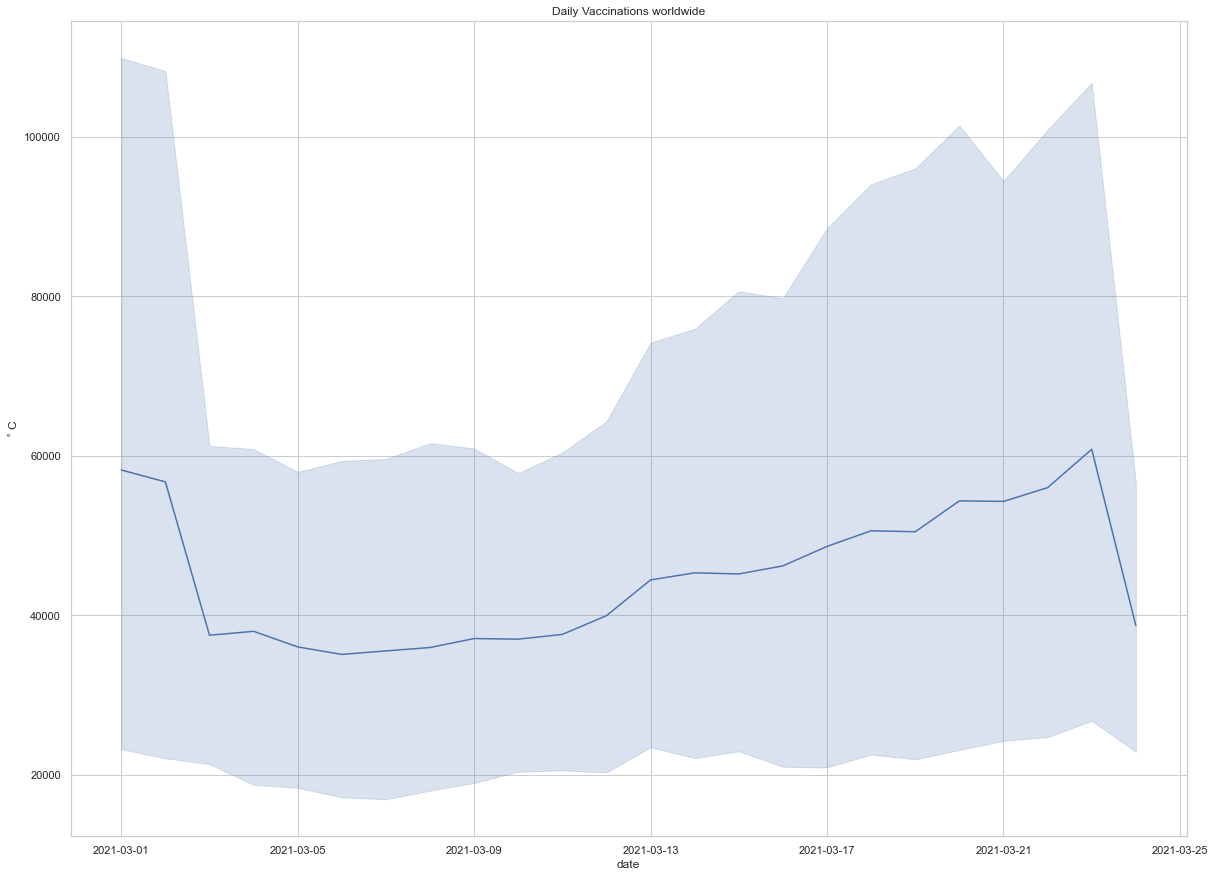

In [91]:
#Daily vaccinations for March:
fig, ax = plt.subplots()
sns.lineplot(x='date', y='daily_vaccinations', data=df_daily_march, ax=ax)#, hue=('country' == 'Germany'
ax.set(title='Daily Vaccinations worldwide', ylabel=r'$^\circ$C');

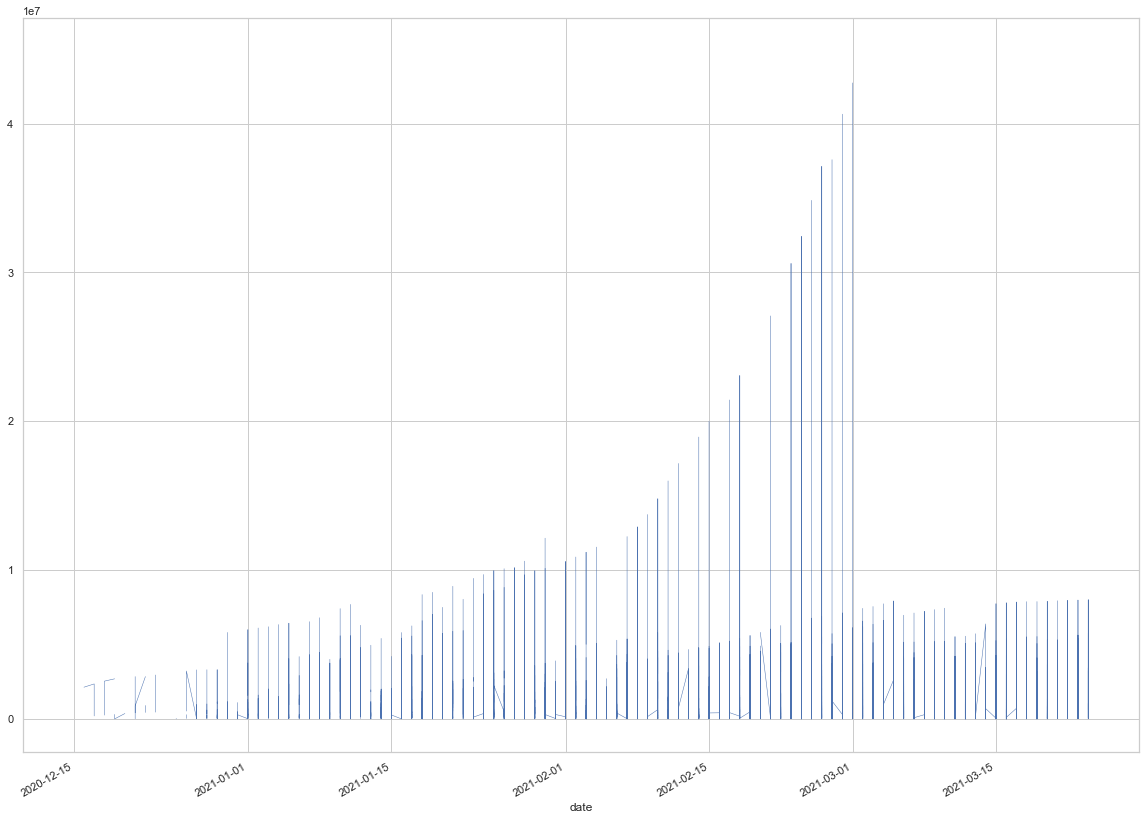

In [92]:
#People vaccinated from december up to now:
df_daily['people_vaccinated'].plot(linewidth=0.5);

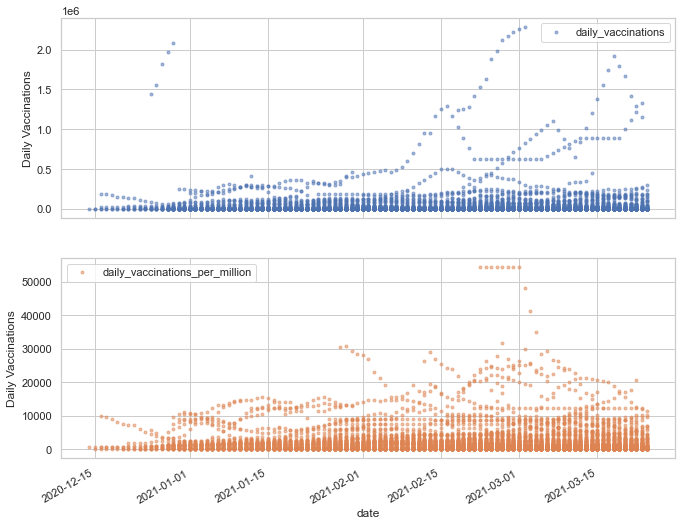

In [93]:
#Daily vaccinations worldwide:
cols_plot = ['daily_vaccinations', 'daily_vaccinations_per_million']#'total_vaccinations'
axes = df_daily[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9), subplots=True)
for ax in axes:
    ax.set_ylabel('Daily Vaccinations')

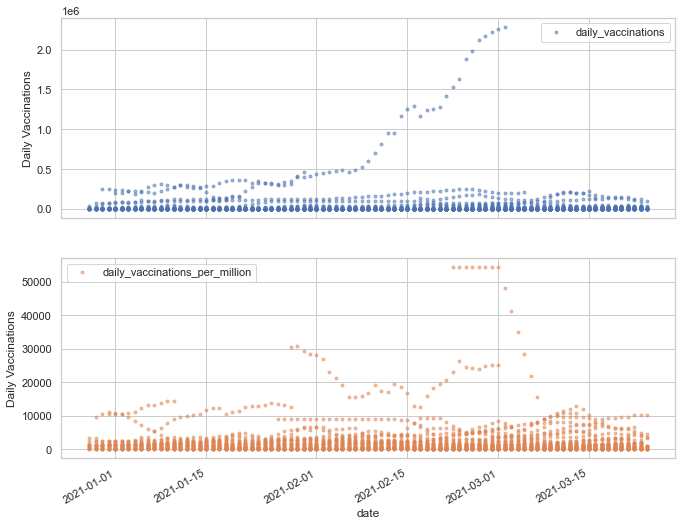

In [94]:
#Daily vaccinations Europe:
df_daily_EU_GB = df_daily[df_daily['cgrouped'] == 'Europe']
cols_plot = ['daily_vaccinations', 'daily_vaccinations_per_million']#'total_vaccinations'
axes = df_daily_EU_GB[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9), subplots=True)
for ax in axes:
    ax.set_ylabel('Daily Vaccinations')

In [95]:
#Daily vaccinations EU and GB:
#df_daily_EU_GB = df_daily.loc[]
#cols_plot = ['daily_vaccinations', 'daily_vaccinations_per_million']#'total_vaccinations'
#axes = df_daily[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9), subplots=True)
#for ax in axes:
    #ax.set_ylabel('Daily Vaccinations')

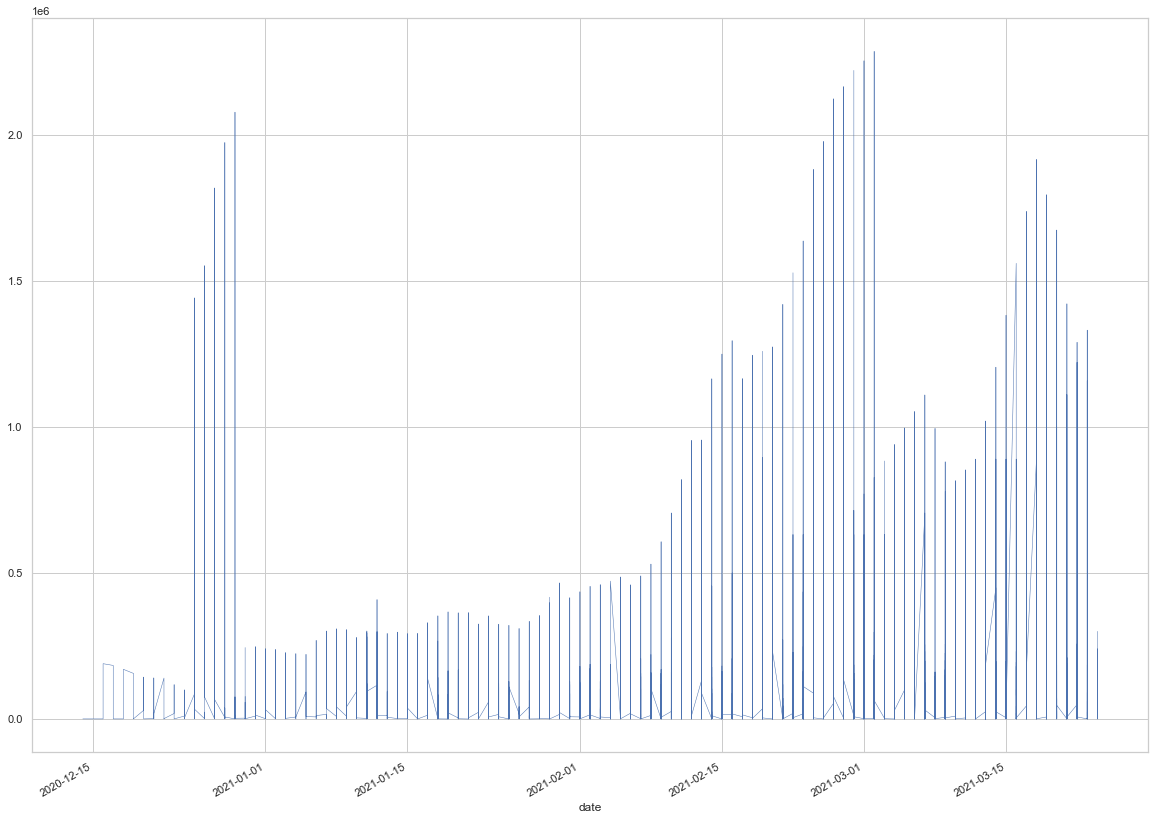

In [96]:
#Daily vaccinated from december up to now:
df_daily['daily_vaccinations'].plot(linewidth=0.5);

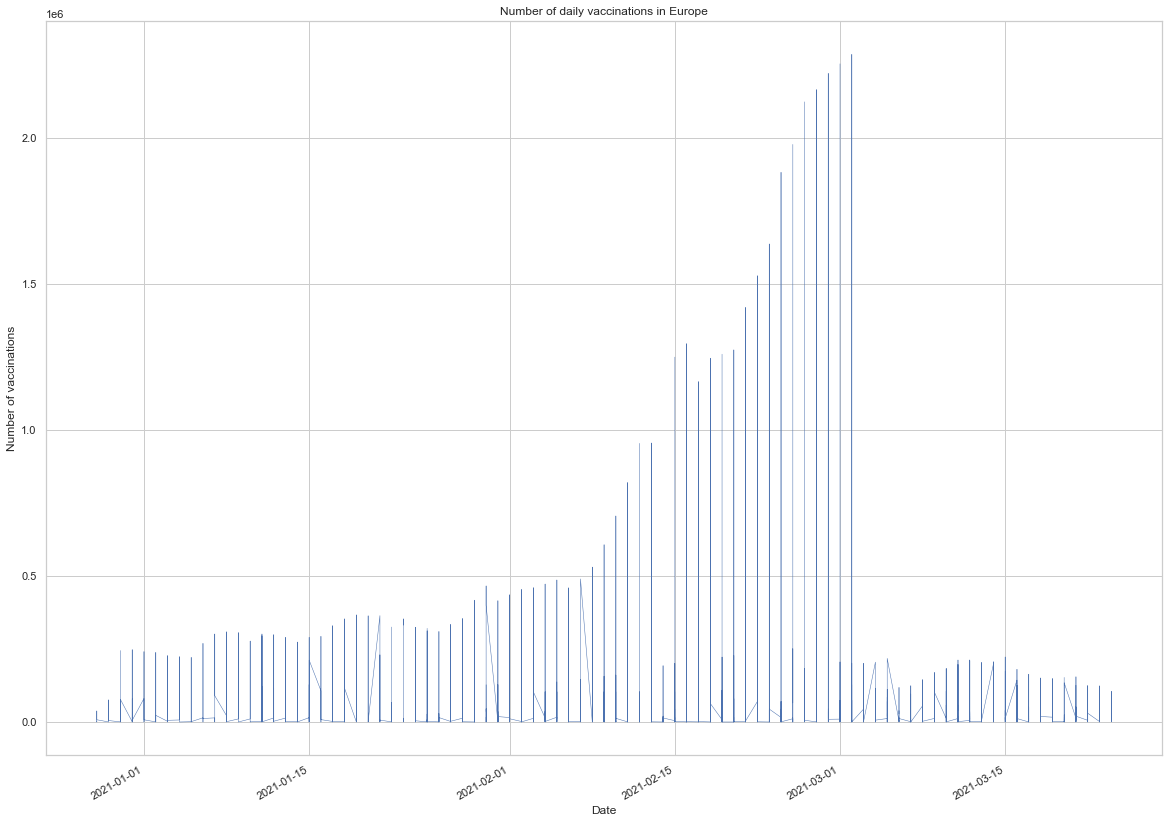

In [97]:
#Daily vaccinated from december up to now for Europe:
df_daily_EU_GB['daily_vaccinations'].plot(linewidth=0.5, title='Number of daily vaccinations in Europe', xlabel = "Date", ylabel = 'Number of vaccinations');

In [98]:
df_daily_EU = df_daily[df_daily['cgrouped'] == 'Europe']

In [99]:
df_daily_EU = df_daily[df_daily['cgrouped'] == 'Europe']
UK = df_daily[df_daily['cgrouped'] == 'UK & British Oversea']
USA = df_daily[df_daily['cgrouped'] == 'USA']
Asia = df_daily[df_daily['cgrouped'] == 'Asia']


In [100]:
df6.sample(20)

,country,Covaxin,EpiVacCorona,Johnson&Johnson,Moderna,Oxford/AstraZeneca,Pfizer/BioNTech,Sinopharm/Beijing,Sinopharm/Wuhan,Sinovac,...,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,cgrouped,daily_vaccinations_per_hundred
date,,,,,,,,,,,,,,,,,,,,,
2021-02-28,Austria,0,0,0,1,1,1,0,0,0,...,346033.0,249779.0,96254.0,13219.0,3.84,2.77,1.07,1468.0,Europe,0.1468
2021-03-08,Cayman Islands,0,0,0,0,0,1,0,0,0,...,NaN,NaN,0.0,275.0,NaN,NaN,0.00,4184.0,UK_BritishOversea,0.4184
2021-01-24,Sweden,0,0,0,0,1,1,0,0,0,...,NaN,NaN,0.0,10929.0,NaN,NaN,0.00,1868.0,Europe,0.1868
2021-02-06,India,1,0,0,0,1,0,0,0,0,...,144798.0,138983.0,5815.0,5581.0,1.50,1.44,0.06,578.0,Asia,0.0578
2021-01-08,Oman,0,0,0,0,1,1,0,0,0,...,NaN,NaN,0.0,30701.0,NaN,NaN,0.00,1792.0,Middle_East,0.1792
2021-02-26,Argentina,0,0,0,0,1,0,1,0,0,...,606245.0,371629.0,234616.0,19266.0,1.34,0.82,0.52,426.0,South_America,0.0426
2021-03-11,South Africa,0,0,1,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Africa,NaN
2020-12-31,Kuwait,0,0,0,0,0,1,0,0,0,...,21007.0,17829.0,3178.0,881.0,20.78,17.64,3.14,8716.0,Middle_East,0.8716
2021-01-24,Bulgaria,0,0,0,1,1,1,0,0,0,...,13013331.0,9709526.0,3303805.0,324639.0,6.12,4.57,1.55,1527.0,Europe,0.1527


###### 

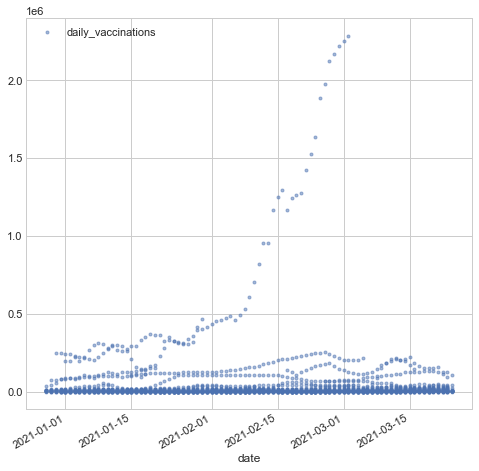

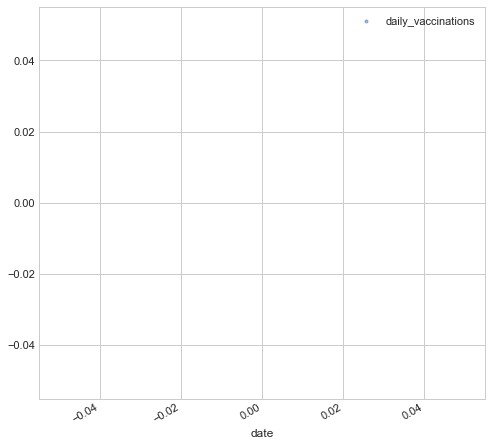

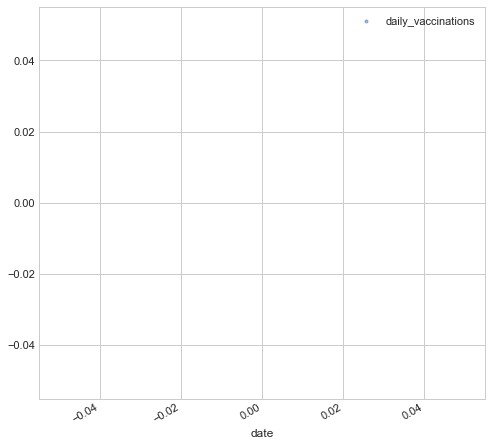

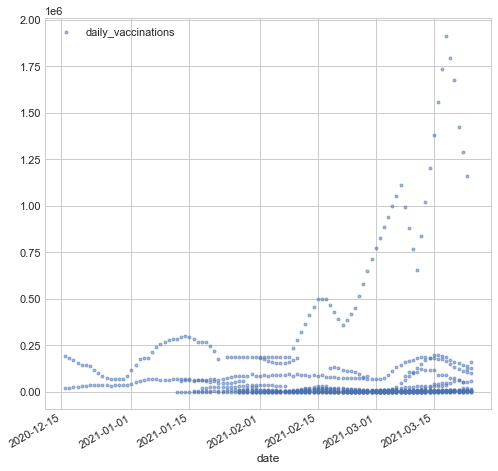

In [101]:
plt.style.use('seaborn-whitegrid')
cols_plot = ['daily_vaccinations']#'total_vaccinations', , 'daily_vaccinations_per_million'
axes1 = df_daily_EU[cols_plot].plot(marker='.', alpha=0.5, linestyle='None',figsize = (8,8), subplots=True);
axes2 = UK[cols_plot].plot(marker='.', alpha=0.5, linestyle='None',figsize = (8,8), subplots=True);
axes3 = USA[cols_plot].plot(marker='.', alpha=0.5, linestyle='None',figsize = (8,8), subplots=True);
axes4 = Asia[cols_plot].plot(marker='.', alpha=0.5, linestyle='None',figsize = (8,8), subplots=True);
#for ax in axes:
    #ax.set_ylabel('Daily Vaccinations')

### Worldmap

In [105]:
#Initialize visualization set:
sns.set(style='whitegrid', palette='pastel', color_codes=True) 
sns.mpl.rc('figure', figsize=(10,6))

In [120]:
import geopandas as gpd
#from shapely.geometry import Point
import geopy
from geopy.exc import GeocoderTimedOut
from geopy.geocoders import Nominatim

ModuleNotFoundError: No module named 'geopandas'

In [ ]:
#import geo data
import geopandas as gpd
## map plot based on country map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.head()

In [ ]:
#join new map data to existing CV19 vaccine dataframe
mapped = world.set_index('iso_a3').join(df2.set_index('iso_code')).reset_index()

In [ ]:
#function to create map graph
def graph_world(feature):
    to_be_mapped = feature
    vmin, vmax = 0,100
    fig, ax = plt.subplots(1, figsize=(25,25))

    mapped.plot(column=to_be_mapped, cmap='Blues', linewidth=0.8, ax=ax, edgecolors='0.8')
    ax.set_title('x', fontdict={'fontsize':30})
    ax.set_axis_off()

    sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax))
    sm._A = []

    cbar = fig.colorbar(sm, orientation='horizontal')

In [ ]:
# Compare visually vaccination rates across world
graph_world('people_fully_vaccinated_per_hundred')

In [ ]:
#daily vaccinations
graph_world('daily_vaccinations')

In [ ]:
#total vaccinations per hundr
graph_world('total_vaccinations_per_hundred')

In [113]:
#df_coordinates = pd.read_csv('coordinates.csv')
df_coordinates_wo_Province = pd.read_csv('coordinates_wo_Province.csv')

In [114]:
df_coordinates_wo_Province.shape

(950670, 4)

In [115]:
df2_for_merge = df2[['country', 'iso_code']].copy()

In [116]:
#add latitude/longitude data to dataframe for worldmap plotting:


df2_with_coordinates_wo_Province = pd.merge(df2_for_merge, df_coordinates_wo_Province, on='iso_code')#, left_on='iso_code', right_on='country'

In [117]:

#df2_with_coordinates_concat = pd.concat([df2_for_merge, df_coordinates_wo_Province], keys='iso_code')

In [118]:
df2_with_coordinates_wo_Province.sample(10)

,country_x,iso_code,country_y,Lat,Long
45697273,United States,USA,US,42.734201,-94.678626
181820695,United States,USA,US,38.000180,-101.321681
39759922,United States,USA,US,32.785501,-91.461201
76971090,United States,USA,US,34.880845,-88.579962
153036925,United States,USA,US,33.434433,-79.332021
4386533,Czechia,CZE,Czechia,49.817500,15.473000
14115365,United States,USA,US,29.401673,-94.904691
222066776,United States,USA,US,39.000720,-89.024527
253167252,United States,USA,US,34.974032,-80.099533
81545944,United States,USA,US,35.511237,-86.455491


In [119]:
df2_with_coordinates_wo_Province[df2_with_coordinates_wo_Province.iso_code == 'USA']

KeyboardInterrupt: 

In [ ]:
df = pd.DataFrame({'one': {'A': 10, 'B': 20, 'C': 30, 'D': 40, 'E': 50}})
map_dict = {'A': 'every', 'B': 'good', 'C': 'boy', 'D': 'does', 'E': 'fine'}

df['two'] = df.index.to_series().map(map_dict)

AAAARGHHHHH!!!! warum concatenate nur USA und merge alles nur nicht USA????

In [ ]:
df2_with_coordinates.sample(10)

In [ ]:
df2_with_coordinates[df2_with_coordinates.country == 'China'].head

In [ ]:
df2_with_coordinates.shape

In [ ]:
# declare an empty list to store
# latitude and longitude of values 
# of city column
longitude = []
latitude = []

In [ ]:
# function to find the coordinate
# of a given country 


#geolocator = Nominatim()

#tmp = df.head().copy()

#latlon = tmp.Address.apply(lambda addr: geolocator.geocode(addr))

#tmp["Latitude"] = [x.latitude for x in latlon]
#tmp["Longitude"] = [x.longitude for x in latlon]


def findGeocode(country):
       
    # try and catch is used to overcome
    # the exception thrown by geolocator
    # using geocodertimedout  
    try:
          
        # Specify the user_agent as your
        # app name it should not be none
        geopy.geocoders.options.default_user_agent = "my-application"
        geolocator = Nominatim()#user_agent="your_app_name",user_agent="my-application"
      
          
        return geolocator.geocode(country)
      
    except GeocoderTimedOut:
          
        return findGeocode(country)    
  
# each value from country column
# will be fetched and sent to
# function find_geocode   
for i in (df2['country']):
      
    if findGeocode(i) != None:
        loc = findGeocode(i)
          
        # coordinates returned from 
        # function is stored into
        # two separate list
        latitude.append(loc.latitude)
        longitude.append(loc.longitude)
       
    # if coordinate for a country not
    # found, insert "NaN" indicating 
    # missing value 
    else:
        latitude.append(np.nan)
        longitude.append(np.nan)
geolocate(country='USA')

In [ ]:
def geolocate(country=None):
    '''
    Inputs country. Returns the lat/long coordinates of the center of the country.
    '''
    
    # If country exists,
    for i in (df2['country']):
        if country != None:
            # Try
            try:
                # To geolocate country
                loc = geolocator.geocode(country)
                latitude.append(loc.latitude)
                longitude.append(loc.longitude)
                # And return latitude and longitude
               # return (loc.latitude, loc.longitude)
            # Otherwise
            except:
                # Return missing value
                return np.nan
        # If country doesn't exist
        else:
            # Try
            try:
                # Geolocate the center of the country
                loc = geolocator.geocode(country)
                # And return latitude and longitude 
                return (loc.latitude, loc.longitude)
            # Otherwise
            except:
                # Return missing value
                return np.nan
 


In [ ]:
geolocate(country='China')

In [ ]:
# now add this column to dataframe
df2["Longitude"] = longitude
df2["Latitude"] = latitude
  
df2.head()

In [ ]:
#creation of a shapefile out of df2
#col_vacc = ['country', 'people_vaccinated_per_hundred', 'vaccines']
#vacc_am_bycountry = df2[col_vacc].groupby('country').max().sort_values('people_vaccinated_per_hundred', ascending=False).dropna(subset=['people_vaccinated_per_hundred'])
#vacc_am_bycountry['geometry'] = df.apply(lambda x: Point((float(x.lon), float(x.lat))), axis=1)

In [ ]:
shapefile = 'map/countries_110m/ne_110m_admin_0_countries.shp'
#Read shapefile using Geopandas
#gdf = gpd.read_file(shapefile)[['ADMIN', 'ADM0_A3', 'geometry']]
#Rename columns.
gpd.columns = ['country', 'country_code', 'geometry']
gpd.head()

# Conclusion

ML

In [ ]:
# When will your country achieve over 80% people vaccinated? (any vaccine faster/better available?)

In [ ]:
# gpd datensatz mit Einwohnerzahl und strength of economy dazu mergen. Dann ED = (daily vaccinations, people, strength of economy, vaccines)
#EDt+1=f(EDt,EDt−1,EDt−2,EDt−3,…,error)
 
#There is also a third type of model which combines the features of the above two models. For example, it might be given by
#EDt+1=f(EDt,current temperature, time of day, day of week, error).These types of “mixed models” have been given various names in different disciplines. 
#They are known as dynamic regression models, panel data models, longitudinal models, transfer function models, and linear system models (assuming thatf is linear). 
#These models are discussed in Chapter 9.